In [51]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò (ÌïÑÏöîÌïú Í≤ΩÏö∞)
# !pip install h2o shap lime pandas scikit-learn matplotlib

import h2o
from h2o.automl import H2OAutoML
import shap
import lime
import lime.lime_tabular
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')
# H2O Ï¥àÍ∏∞Ìôî
h2o.init()

# SHAP ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï¥àÍ∏∞ ÏÑ§Ï†ï (Jupyter Notebook/Lab ÌôòÍ≤Ω)
shap.initjs()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "21" 2023-09-19; OpenJDK Runtime Environment (build 21+35-2513); OpenJDK 64-Bit Server VM (build 21+35-2513, mixed mode, sharing)
  Starting server from /Users/dante/workspace/dante-code/projects/kmu-practical-ds-2025/.conda/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/5y/vwfpdbc96lb5kxd7pmfd9rl00000gn/T/tmpy0bxat9q
  JVM stdout: /var/folders/5y/vwfpdbc96lb5kxd7pmfd9rl00000gn/T/tmpy0bxat9q/h2o_dante_started_from_python.out
  JVM stderr: /var/folders/5y/vwfpdbc96lb5kxd7pmfd9rl00000gn/T/tmpy0bxat9q/h2o_dante_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Asia/Seoul
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    22 days
H2O_cluster_name:           H2O_from_python_dante_4dvgfp
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.984 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54323
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.9 final
--------------------------  -----------------------------

### Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (H2O Ï†úÍ≥µ ÏôÄÏù∏ ÌíàÏßà Îç∞Ïù¥ÌÑ∞ÏÖã ÏòàÏãú)
data_path = "https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv"
df_h2o = h2o.import_file(data_path)

Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%


In [4]:
df_h2o

fixed acidity    volatile acidity    citric acid    residual sugar    chlorides    free sulfur dioxide    total sulfur dioxide    density    pH    sulphates    alcohol    quality  type
---------------  ------------------  -------------  ----------------  -----------  ---------------------  ----------------------  ---------  ----  -----------  ---------  ---------  ------
            7                  0.27           0.36              20.7        0.045                     45                     170     1.001   3            0.45        8.8          6  white
            6.3                0.3            0.34               1.6        0.049                     14                     132     0.994   3.3          0.49        9.5          6  white
            8.1                0.28           0.4                6.9        0.05                      30                      97     0.9951  3.26         0.44       10.1          6  white
            7.2                0.23           0.32               8.5        0.058                     47                     186     0.9956  3.19         0.4         9.9          6  white
            7.2                0.23           0.32               8.5        0.058                     47                     186     0.9956  3.19         0.4         9.9          6  white
            8.1                0.28           0.4                6.9        0.05                      30                      97     0.9951  3.26         0.44       10.1          6  white
            6.2                0.32           0.16               7          0.045                     30                     136     0.9949  3.18         0.47        9.6          6  white
            7                  0.27           0.36              20.7        0.045                     45                     170     1.001   3            0.45        8.8          6  white
            6.3                0.3            0.34               1.6        0.049                     14                     132     0.994   3.3          0.49        9.5          6  white
            8.1                0.22           0.43               1.5        0.044                     28                     129     0.9938  3.22         0.45       11            6  white
[6497 rows x 13 columns]

In [5]:
type(df_h2o)

h2o.frame.H2OFrame

In [6]:
# Pandas DataFrameÏúºÎ°úÎèÑ Î≥ÄÌôò (SHAP/LIME ÏÇ¨Ïö© Ïãú ÌïÑÏöî)
df_pd = df_h2o.as_data_frame()
df_pd.head()

/Users/dante/workspace/dante-code/projects/kmu-practical-ds-2025/.conda/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [7]:
# ÌäπÏÑ±(X)Í≥º ÌÉÄÍ≤ü(y) Î≥ÄÏàò ÏÑ§Ï†ï
response_column = "quality" # ÏòàÏ∏° ÎåÄÏÉÅ Ïª¨Îüº (ÏôÄÏù∏ ÌíàÏßà)
# ÎÇòÎ®∏ÏßÄ Ïª¨ÎüºÏùÑ ÌäπÏÑ±ÏúºÎ°ú ÏÇ¨Ïö©
predictors = df_h2o.columns
predictors.remove(response_column)

In [13]:
# H2O FrameÏùÑ ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌï†
train_h2o, test_h2o = df_h2o.split_frame(ratios=[0.8], seed=1)

# Pandas DataFrameÎèÑ ÎèôÏùºÌïòÍ≤å Î∂ÑÌï† (XAI ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö© Ïãú ÌïÑÏöî)
train_pd = train_h2o.as_data_frame()
test_pd = test_h2o.as_data_frame()

X_train_pd = train_pd[predictors]
y_train_pd = train_pd[response_column]
X_test_pd = test_pd[predictors]
y_test_pd = test_pd[response_column]

print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", train_h2o.shape)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", test_h2o.shape)


ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (5205, 13)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1292, 13)


/Users/dante/workspace/dante-code/projects/kmu-practical-ds-2025/.conda/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/dante/workspace/dante-code/projects/kmu-practical-ds-2025/.conda/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


### H2O AutoML Ïã§Ìñâ

In [14]:
# H2O AutoML ÏÑ§Ï†ï
aml = H2OAutoML(max_runtime_secs=120,  # ÏµúÎåÄ Ïã§Ìñâ ÏãúÍ∞Ñ (Ï¥à)
                seed=1)             # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÏãúÎìú

In [15]:
# AutoML ÌïôÏäµ ÏãúÏûë
print("H2O AutoML ÌïôÏäµ ÏãúÏûë...")
start_time = time.time()
aml.train(x=predictors, y=response_column, training_frame=train_h2o)
end_time = time.time()
print(f"AutoML ÌïôÏäµ ÏôÑÎ£å. ÏÜåÏöî ÏãúÍ∞Ñ: {end_time - start_time:.2f} Ï¥à")


H2O AutoML ÌïôÏäµ ÏãúÏûë...
AutoML progress: |
10:37:48.554: AutoML: XGBoost is not available; skipping it.

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
AutoML ÌïôÏäµ ÏôÑÎ£å. ÏÜåÏöî ÏãúÍ∞Ñ: 121.85 Ï¥à


In [16]:
# AutoML Í≤∞Í≥º ÌôïÏù∏ (Î¶¨ÎçîÎ≥¥Îìú)
lb = aml.leaderboard
print("\\nAutoML Î¶¨ÎçîÎ≥¥Îìú:")
print(lb.head(rows=lb.nrows)) # Î™®Îì† Î™®Îç∏ Í≤∞Í≥º Î≥¥Í∏∞

\nAutoML Î¶¨ÎçîÎ≥¥Îìú:
model_id                                                              rmse       mse       mae        rmsle    mean_residual_deviance
StackedEnsemble_AllModels_4_AutoML_1_20250419_103748              0.608024  0.369693  0.429504    0.0921405                  0.369693
StackedEnsemble_AllModels_3_AutoML_1_20250419_103748              0.608196  0.369903  0.429794    0.0921692                  0.369903
StackedEnsemble_BestOfFamily_4_AutoML_1_20250419_103748           0.610222  0.372371  0.433218    0.0924626                  0.372371
StackedEnsemble_BestOfFamily_3_AutoML_1_20250419_103748           0.613824  0.37678   0.43937     0.0929672                  0.37678
StackedEnsemble_AllModels_2_AutoML_1_20250419_103748              0.613843  0.376804  0.439252    0.0929623                  0.376804
StackedEnsemble_BestOfFamily_2_AutoML_1_20250419_103748           0.614111  0.377132  0.440676    0.0929908                  0.377132
StackedEnsemble_AllModels_1_AutoML_1_202

### AutoML Í≤∞Í≥º Î∂ÑÏÑù

> **üìä Î∂ÑÏÑù ÏöîÏïΩ**
> 
> **ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏**
> - **ÏµúÏö∞Ïàò Î™®Îç∏**: "StackedEnsemble_AllModels_4_AutoML_1_20250419_103748"
> - **ÏÑ±Îä•**: RMSE 0.608024Î°ú 1ÏúÑ
> - **ÏïôÏÉÅÎ∏î Ïö∞ÏÑ∏**: ÏÉÅÏúÑ 10Í∞ú Î™®Îç∏ Ï§ë 7Í∞úÍ∞Ä Ïä§ÌÉù ÏïôÏÉÅÎ∏î Î™®Îç∏
> 
> **Î™®Îç∏ Ïú†ÌòïÎ≥Ñ ÏÑ±Îä• ÏàúÏúÑ**
> 1. Ïä§ÌÉù ÏïôÏÉÅÎ∏î(StackedEnsemble)
> 2. GBM/DRF/XRT
> 3. DeepLearning
> 4. GLM
> 
> **ÏÑ±Îä• Î∂ÑÌè¨ ÌäπÏßï**
> - GBM Î™®Îç∏Îì§: Ï§ëÍ∞Ñ ÏÑ±Îä•ÎåÄÏóê Îã§Ïàò Î∂ÑÌè¨
> - Îî•Îü¨Îãù Î™®Îç∏Îì§: ÎåÄÏ≤¥Î°ú ÌïòÏúÑÍ∂åÏóê ÏúÑÏπò
> 
> **Ïò§Ï∞® ÏßÄÌëú Î∂ÑÏÑù**
> - **ÏµúÏÉÅÏúÑ Î™®Îç∏**: RMSE: 0.608055, MSE: 0.369731, MAE: 0.42982
> - **ÏµúÌïòÏúÑ Î™®Îç∏**: RMSE 0.889345 (ÏµúÏÉÅÏúÑÎ≥¥Îã§ 46% Îçî ÎÜíÏùå)
> - **RMSLE Î∂ÑÌè¨**: ÎåÄÎ∂ÄÎ∂Ñ 0.09~0.12 Î≤îÏúÑ
> 
> **Í≤∞Î°†**
> ÏïôÏÉÅÎ∏î Î™®Îç∏Ïù¥ Îã®Ïùº Î™®Îç∏Î≥¥Îã§ ÏùºÍ¥ÄÎêòÍ≤å Ïö∞ÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÎ©∞, ÌäπÌûà GBM Í∏∞Î∞ò Î™®Îç∏Îì§Ïù¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï¢ãÏùÄ ÏòàÏ∏°Î†•ÏùÑ ÎÇòÌÉÄÎÉÑ

In [17]:
# ÏµúÏ†Å Î™®Îç∏ (Î¶¨Îçî Î™®Îç∏) ÌôïÏù∏
leader_model = aml.leader
print("ÏµúÏ†Å Î™®Îç∏ (Leader Model):")
print(leader_model.model_id)

ÏµúÏ†Å Î™®Îç∏ (Leader Model):
StackedEnsemble_AllModels_4_AutoML_1_20250419_103748


### XAI : H2O ÎÇ¥Ïû• ÏÑ§Î™Ö Í∏∞Îä• ÌôúÏö©

In [18]:
print(test_h2o)

  fixed acidity    volatile acidity    citric acid    residual sugar    chlorides    free sulfur dioxide    total sulfur dioxide    density    pH    sulphates    alcohol    quality  type
            8.1                0.28           0.4               6.9         0.05                      30                      97     0.9951  3.26         0.44       10.1          6  white
            8.1                0.22           0.43              1.5         0.044                     28                     129     0.9938  3.22         0.45       11            6  white
            6.2                0.66           0.48              1.2         0.029                     29                      75     0.9892  3.33         0.39       12.8          8  white
            7                  0.33           0.32              1.2         0.053                     38                     138     0.9906  3.13         0.28       11.2          6  white
            7.3                0.24           0.39           

--- H2O AutoML Ï†ÑÏ≤¥ ÏÑ§Î™Ö ---


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                              rmse       mse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------------------------  --------  --------  --------  ---------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_3_AutoML_1_20250419_103748              0.572987  0.328314  0.396822  0.086705                   0.328314                 447                   0.053416  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20250419_103748              0.572987  0.328314  0.396822  0.086705                   0.328314                 239                   0.054849  StackedEnsemble
GBM_grid_1_AutoML_1_20250419_103748_model_21                      0.574901  0.330511  0.402227  0.0864859                  0.330511                 315                   0.005446  GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20250419_103748           0.575362  0.331042  0.400761  0.0870463                  0.331042                 246                   0.008305  StackedEnsemble
GBM_grid_1_AutoML_1_20250419_103748_model_47                      0.576363  0.332195  0.403384  0.0872868                  0.332195                 333                   0.002993  GBM
StackedEnsemble_AllModels_2_AutoML_1_20250419_103748              0.578901  0.335126  0.408036  0.0875099                  0.335126                 143                   0.012166  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20250419_103748           0.578901  0.335126  0.408036  0.0875099                  0.335126                 137                   0.011356  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20250419_103748           0.579385  0.335687  0.409849  0.0875691                  0.335687                 139                   0.008319  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20250419_103748              0.579385  0.335687  0.409849  0.0875691                  0.335687                 142                   0.008763  StackedEnsemble
XRT_1_AutoML_1_20250419_103748                                    0.580639  0.337142  0.419324  0.0876339                  0.337142                 416                   0.002561  DRF
GBM_lr_annealing_selection_AutoML_1_20250419_103748_select_model  0.581559  0.33821   0.399886  0.0879427                  0.33821                  431                   0.003558  GBM
DRF_1_AutoML_1_20250419_103748                                    0.583409  0.340367  0.418179  0.0882931                  0.340367                 416                   0.00361   DRF
GBM_grid_1_AutoML_1_20250419_103748_model_53                      0.584573  0.341725  0.403131  0.088504                   0.341725                 276                   0.003033  GBM
GBM_grid_1_AutoML_1_20250419_103748_model_15                      0.587147  0.344742  0.41779   0.0887437                  0.344742                 296                   0.003882  GBM
GBM_grid_1_AutoML_1_20250419_103748_model_8                       0.587913  0.345642  0.383512  0.0890422                  0.345642                 464                   0.003179  GBM
GBM_grid_1_AutoML_1_20250419_103748_model_33                      0.591587  0.349975  0.42239   0.0893063                  0.349975                 253                   0.003157  GBM
GBM_grid_1_AutoML_1_20250419_103748_model_23                      0.591593  0.349982  0.436116  0.089098                   0.349982                 219                   0.003135  GBM
GBM_grid_1_AutoML_1_20250419_103748_model_87                      0.591674  0.350078  0.391278  0.0892417                  0.350078                 560                   0.003649  GBM
GBM_grid_1_AutoML_1_20250419_103748_model_13                      0.591675  0.35008   0.401373  0.0894626                  0.35008                  450                   0.003217  GBM
GBM_grid_1_AutoML_1_20250419_103748_mod

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

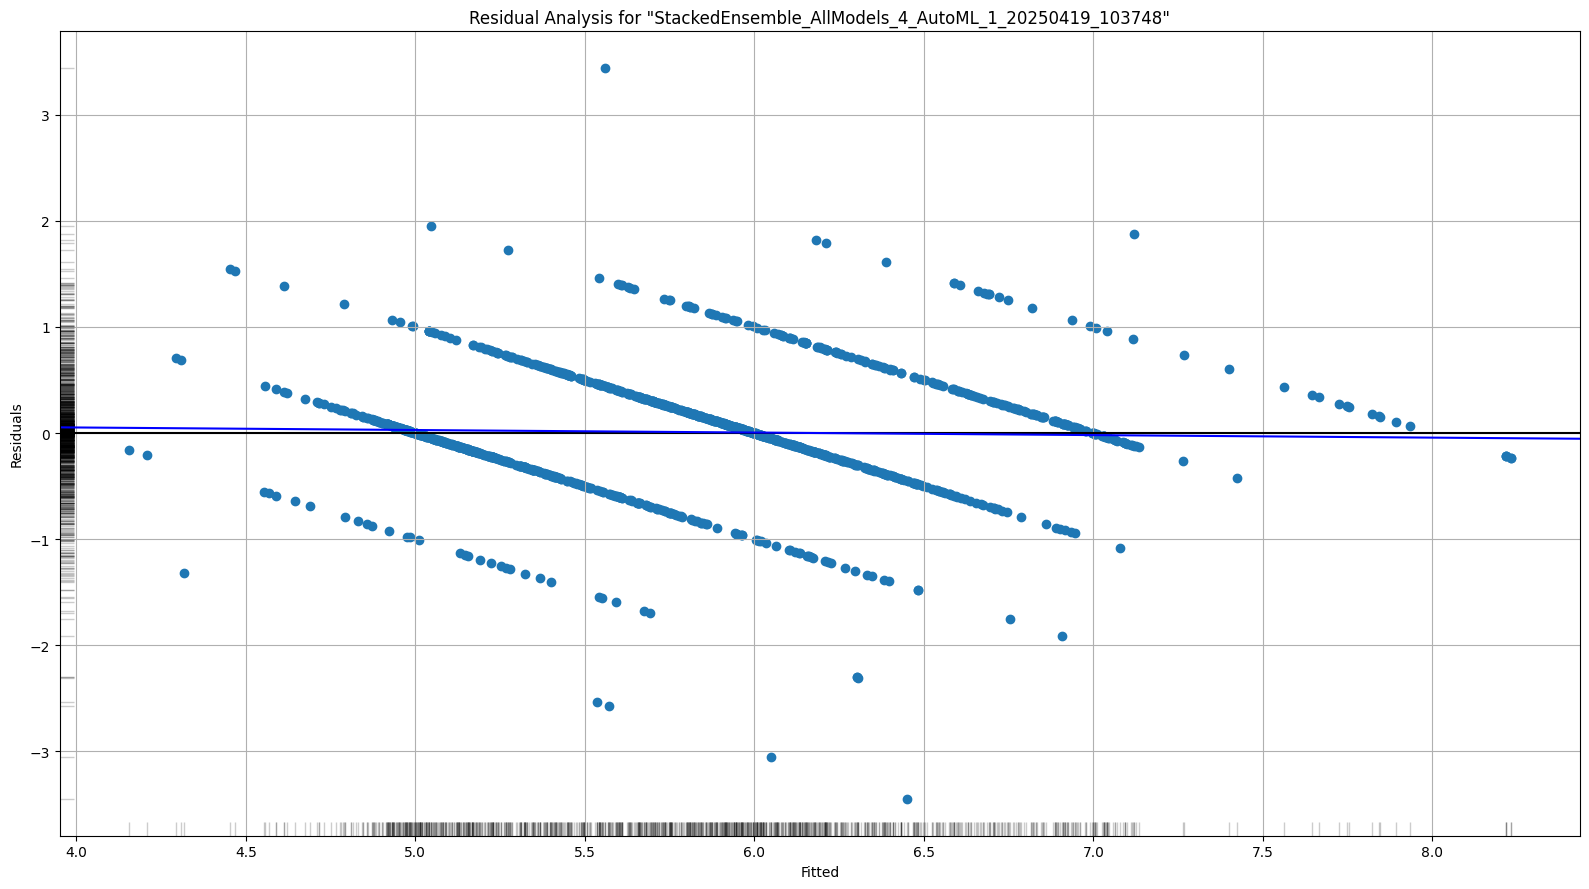

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

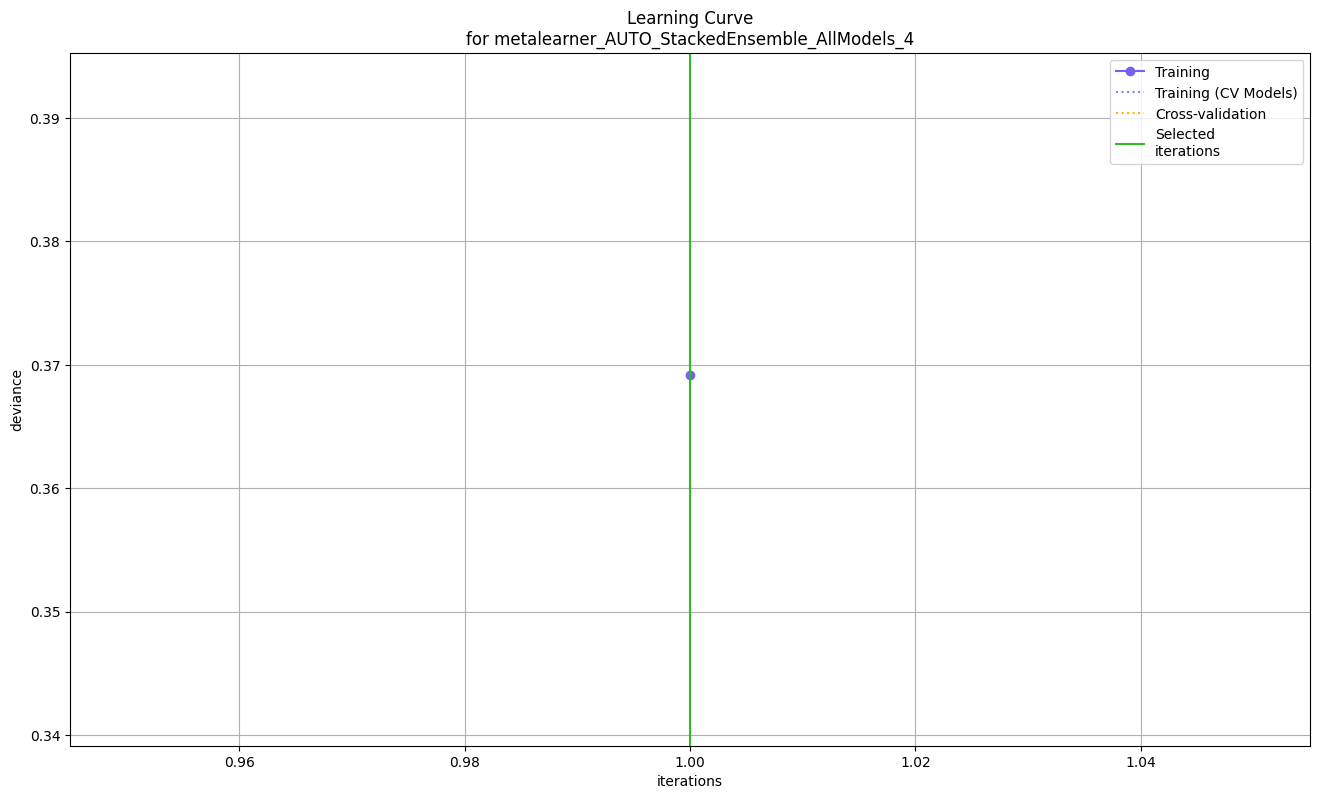

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

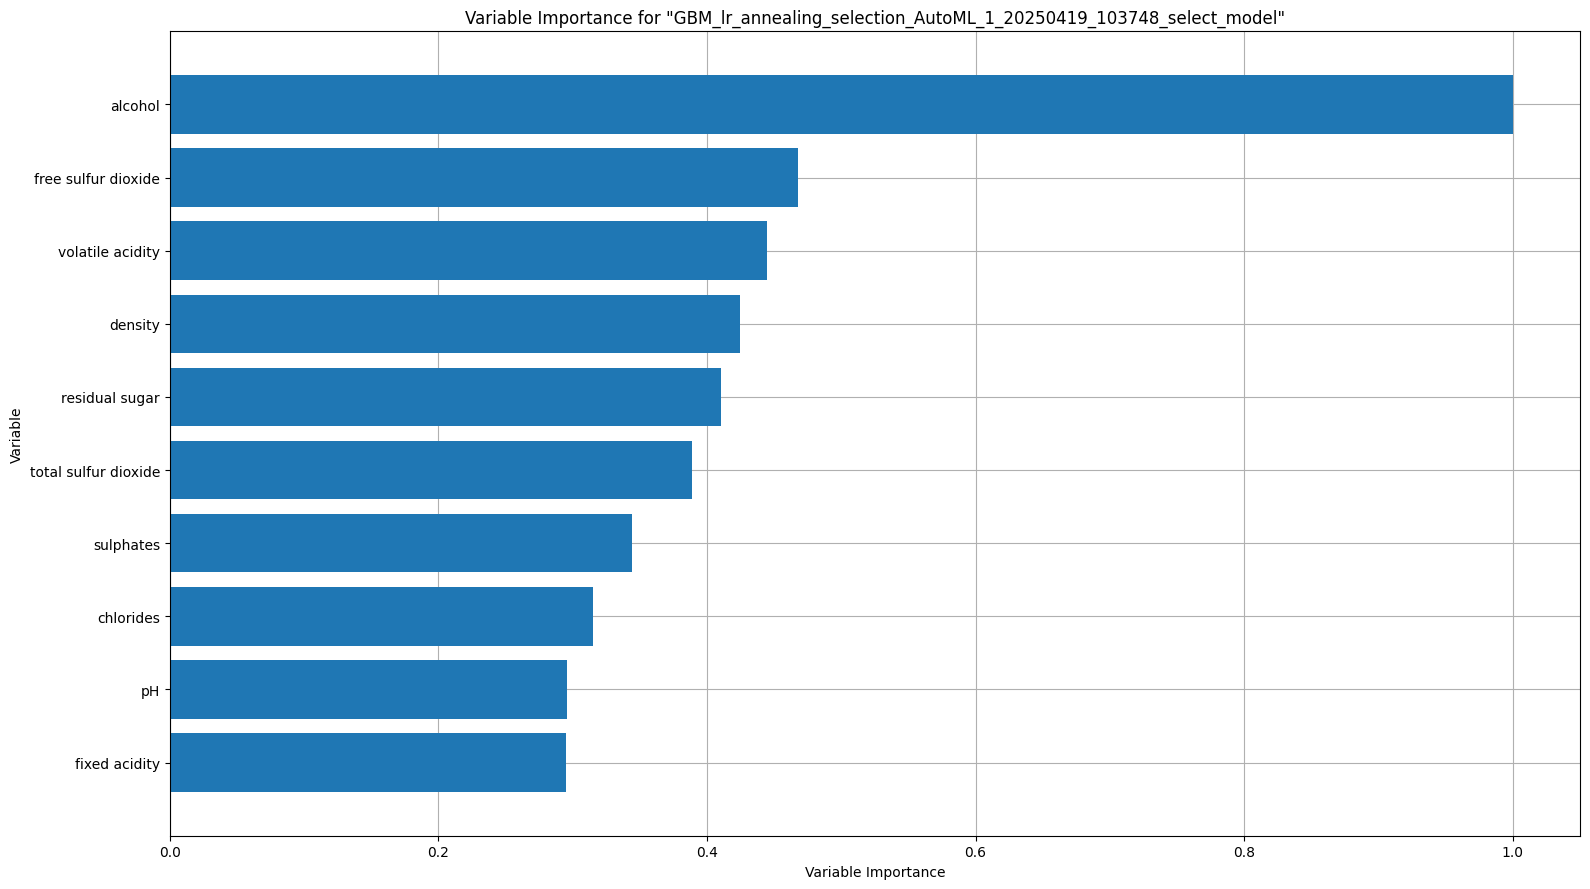

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

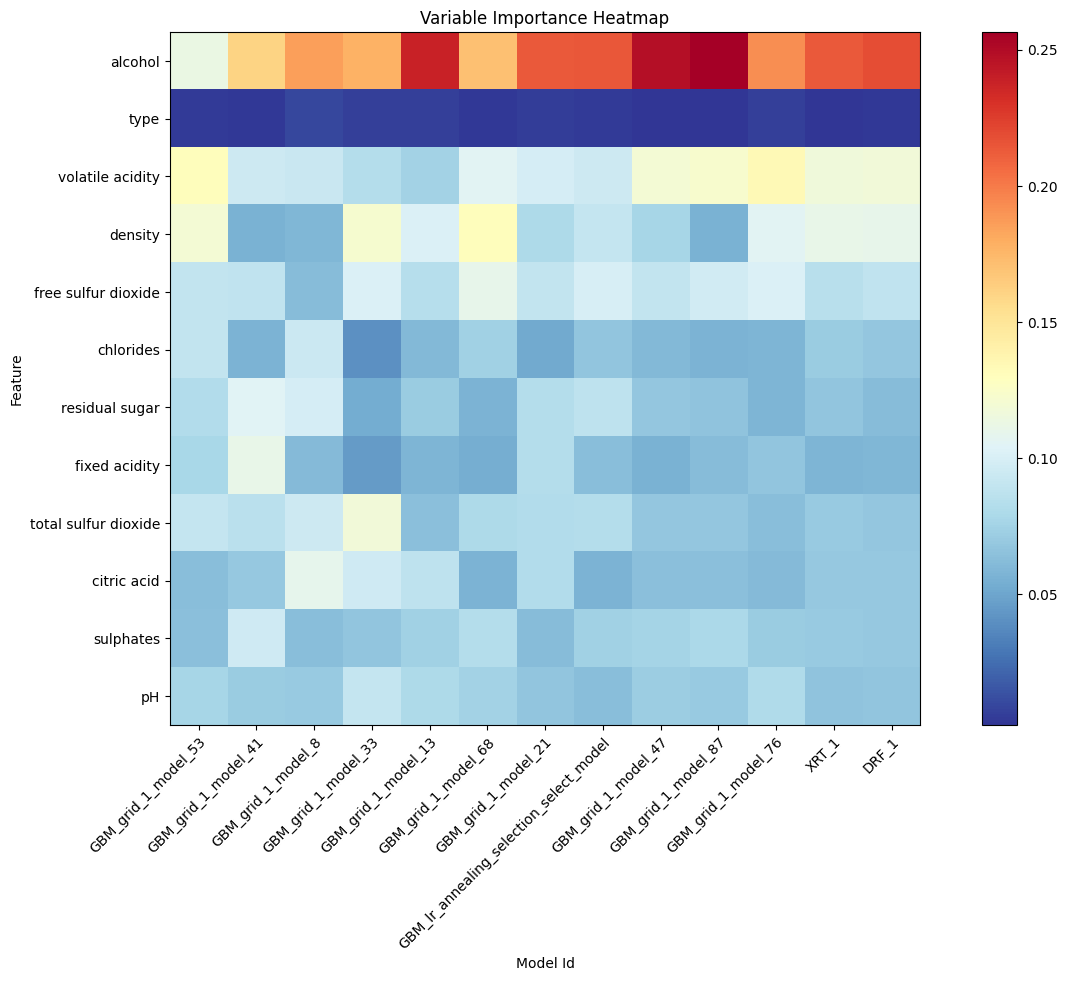

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

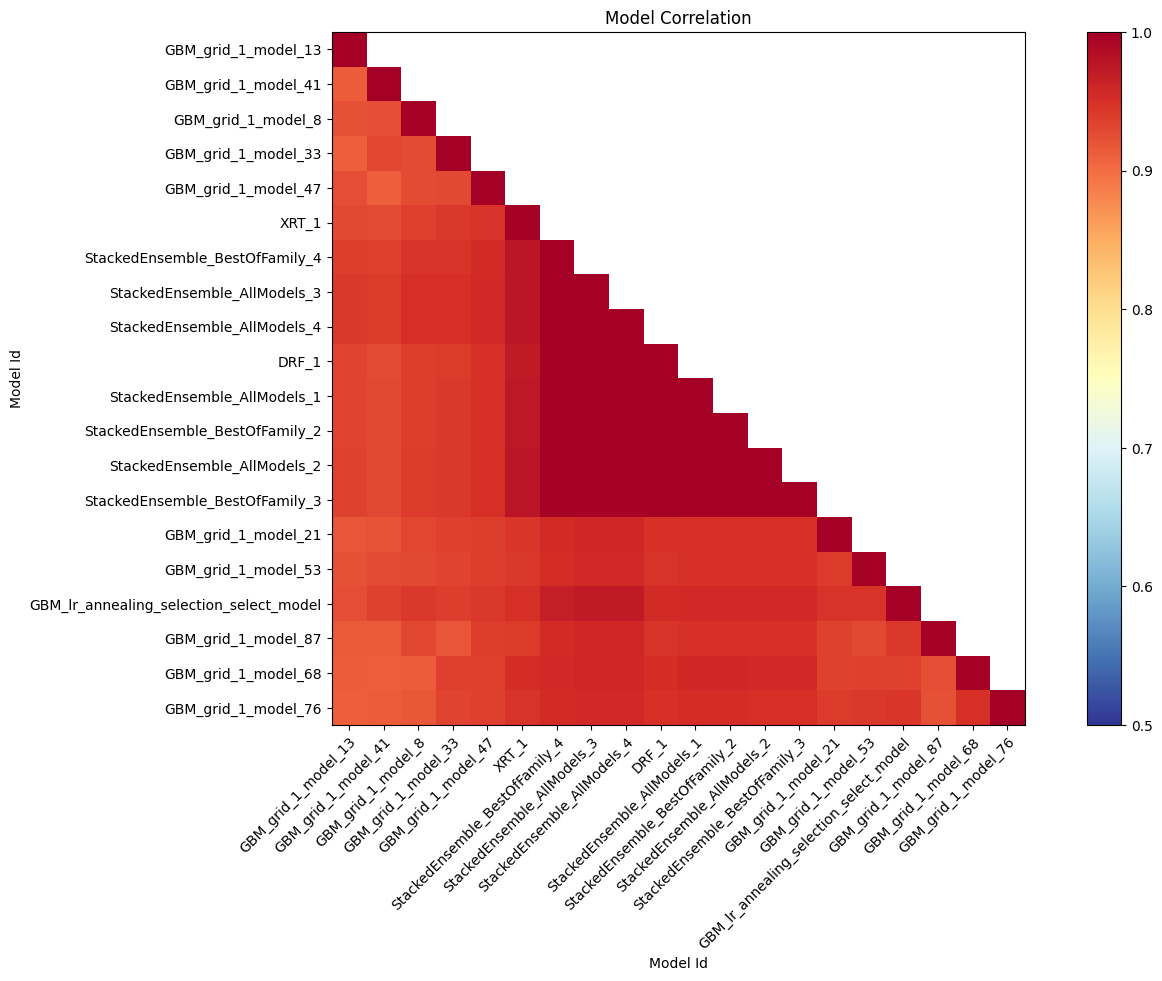

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

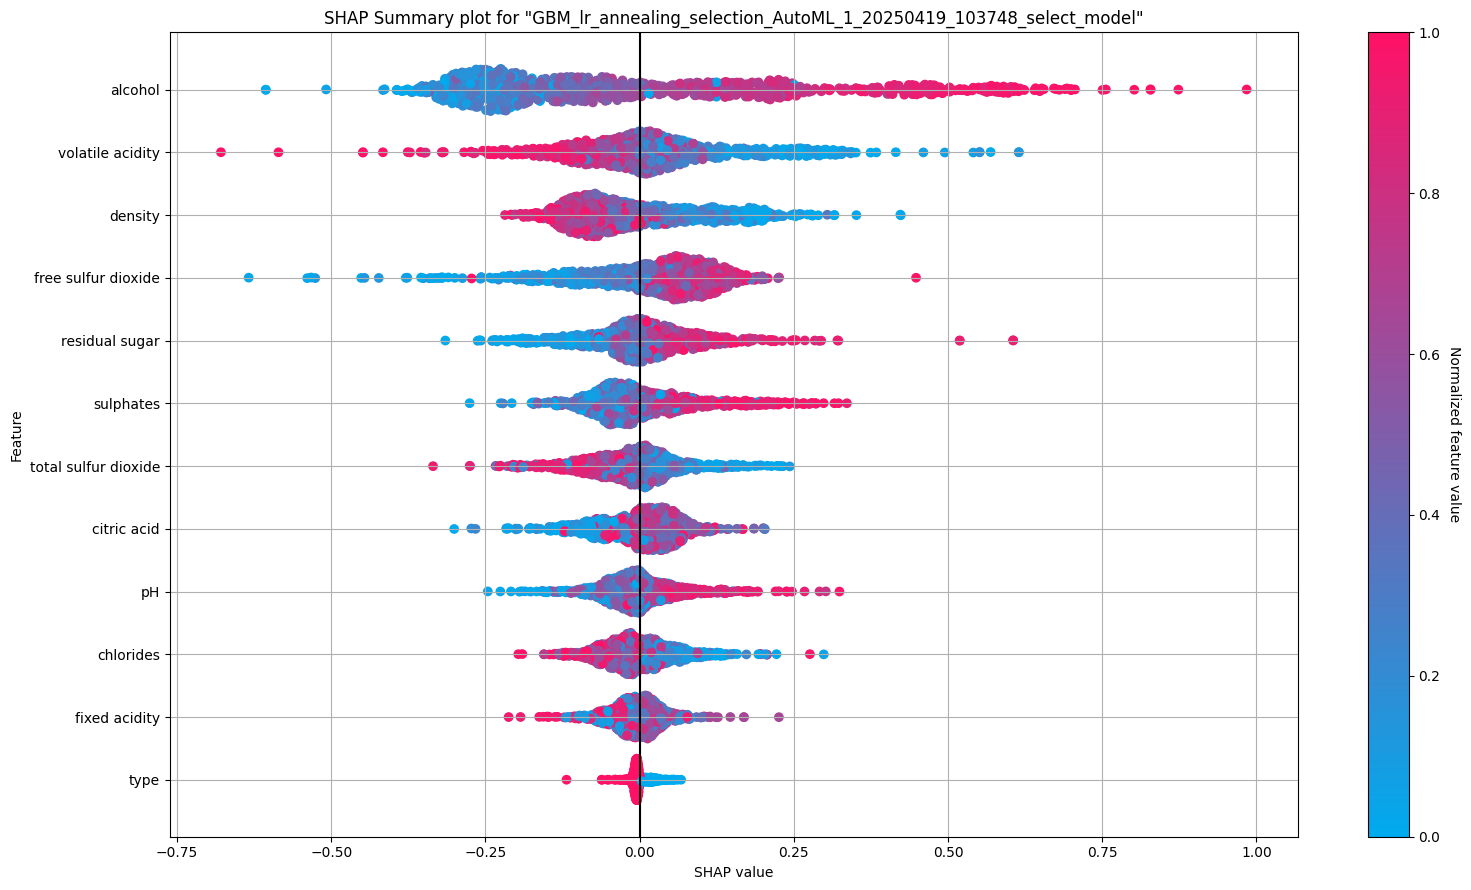

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

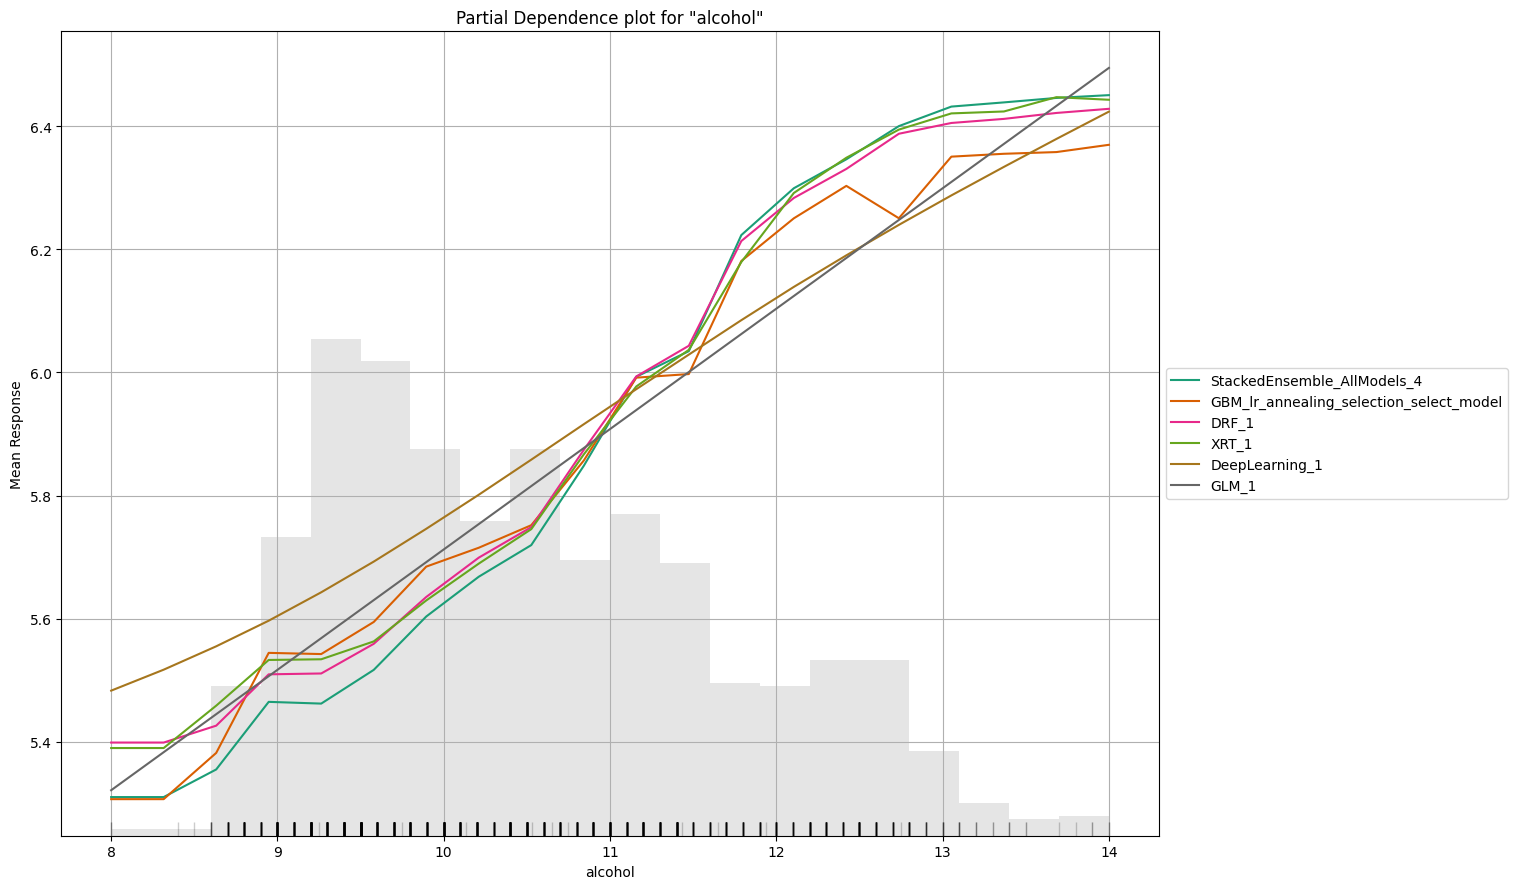

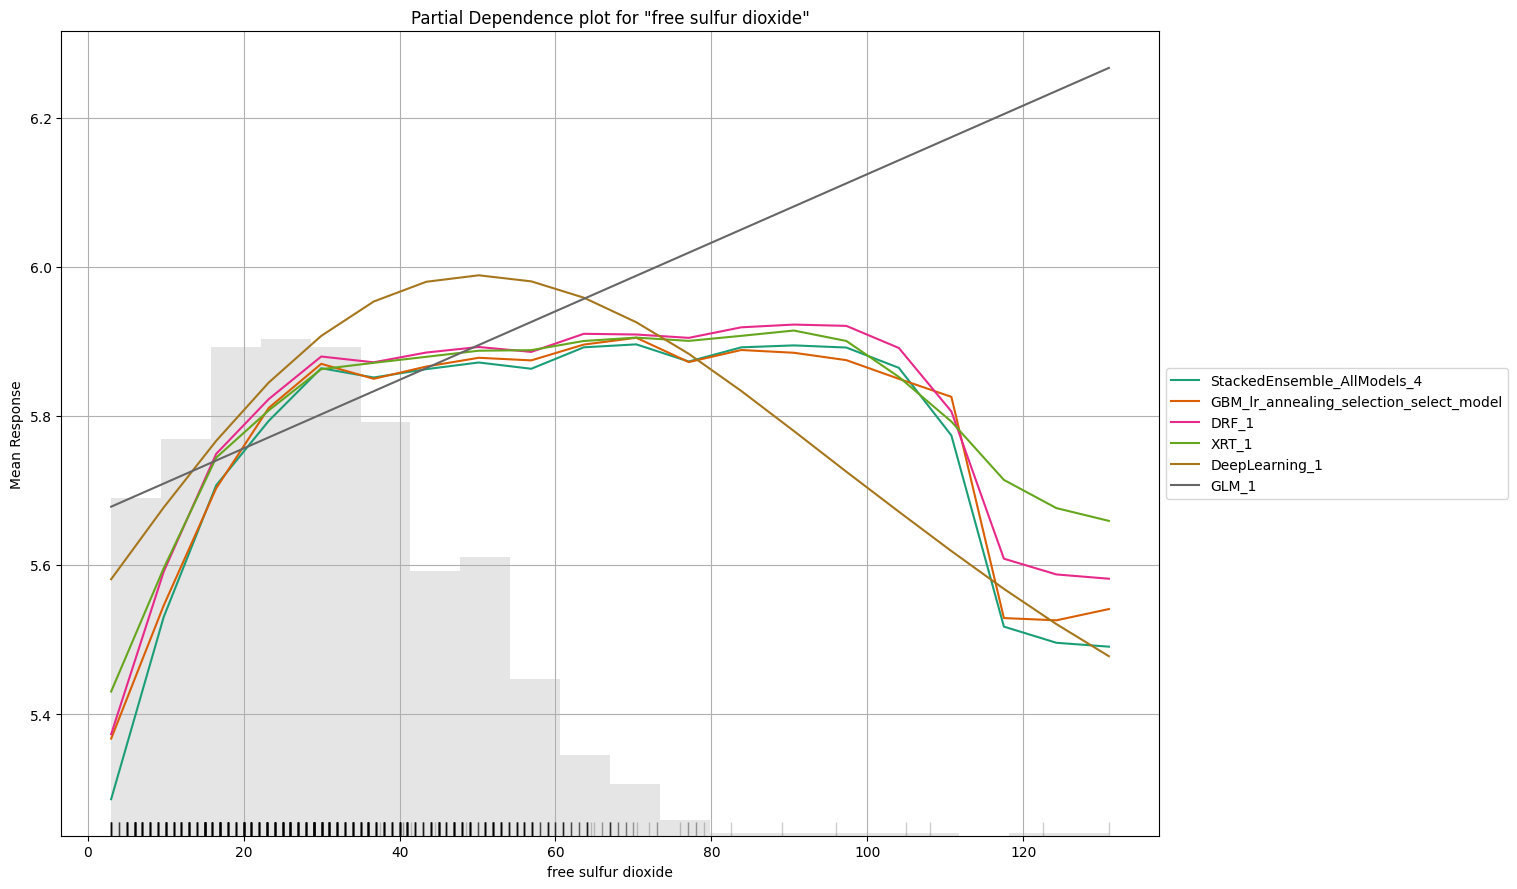

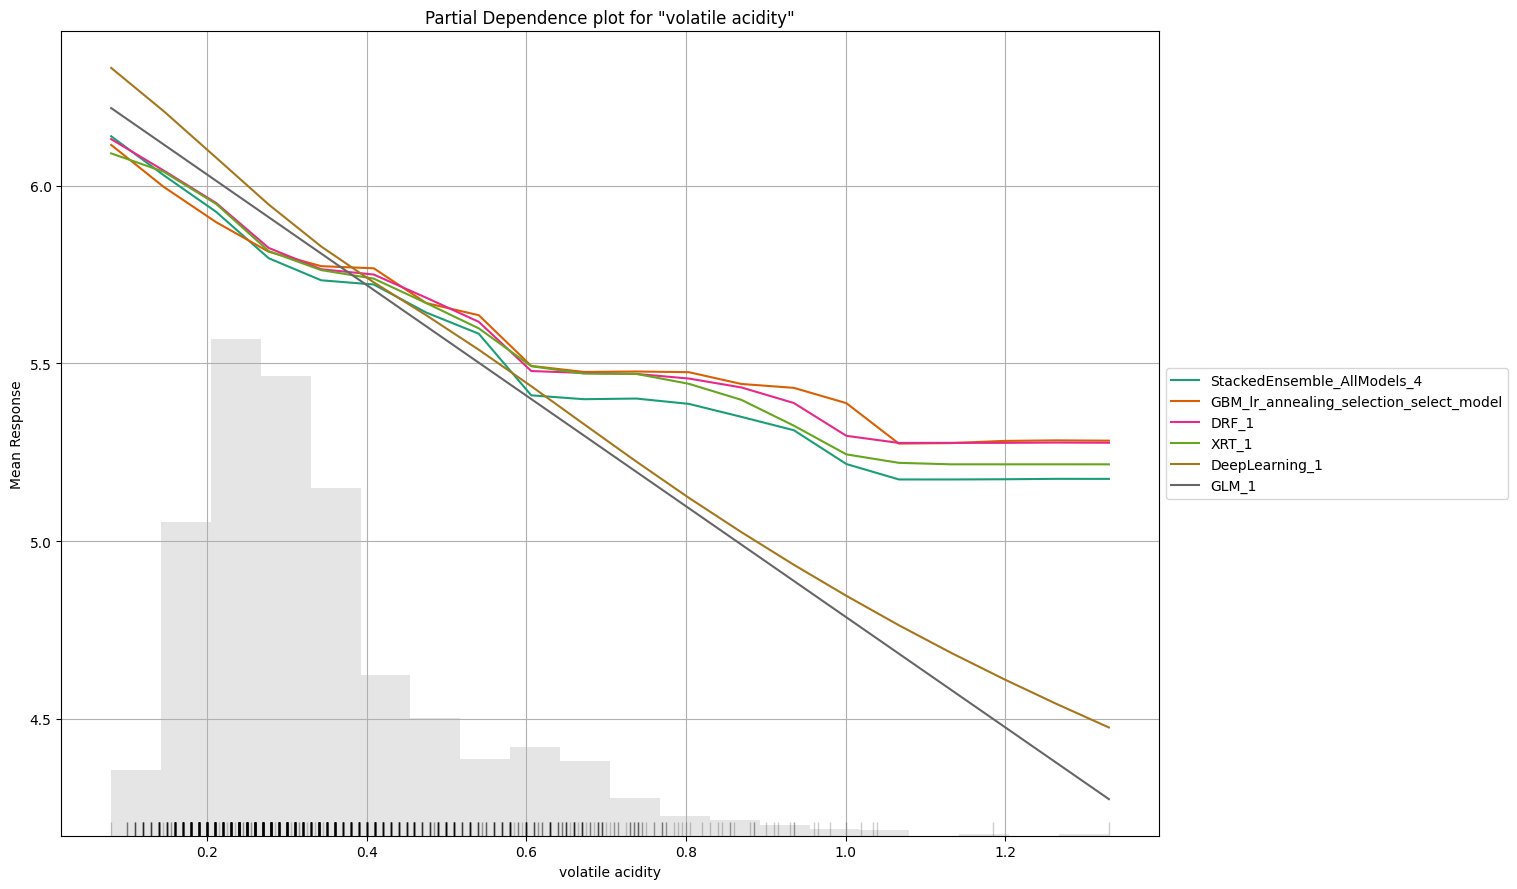

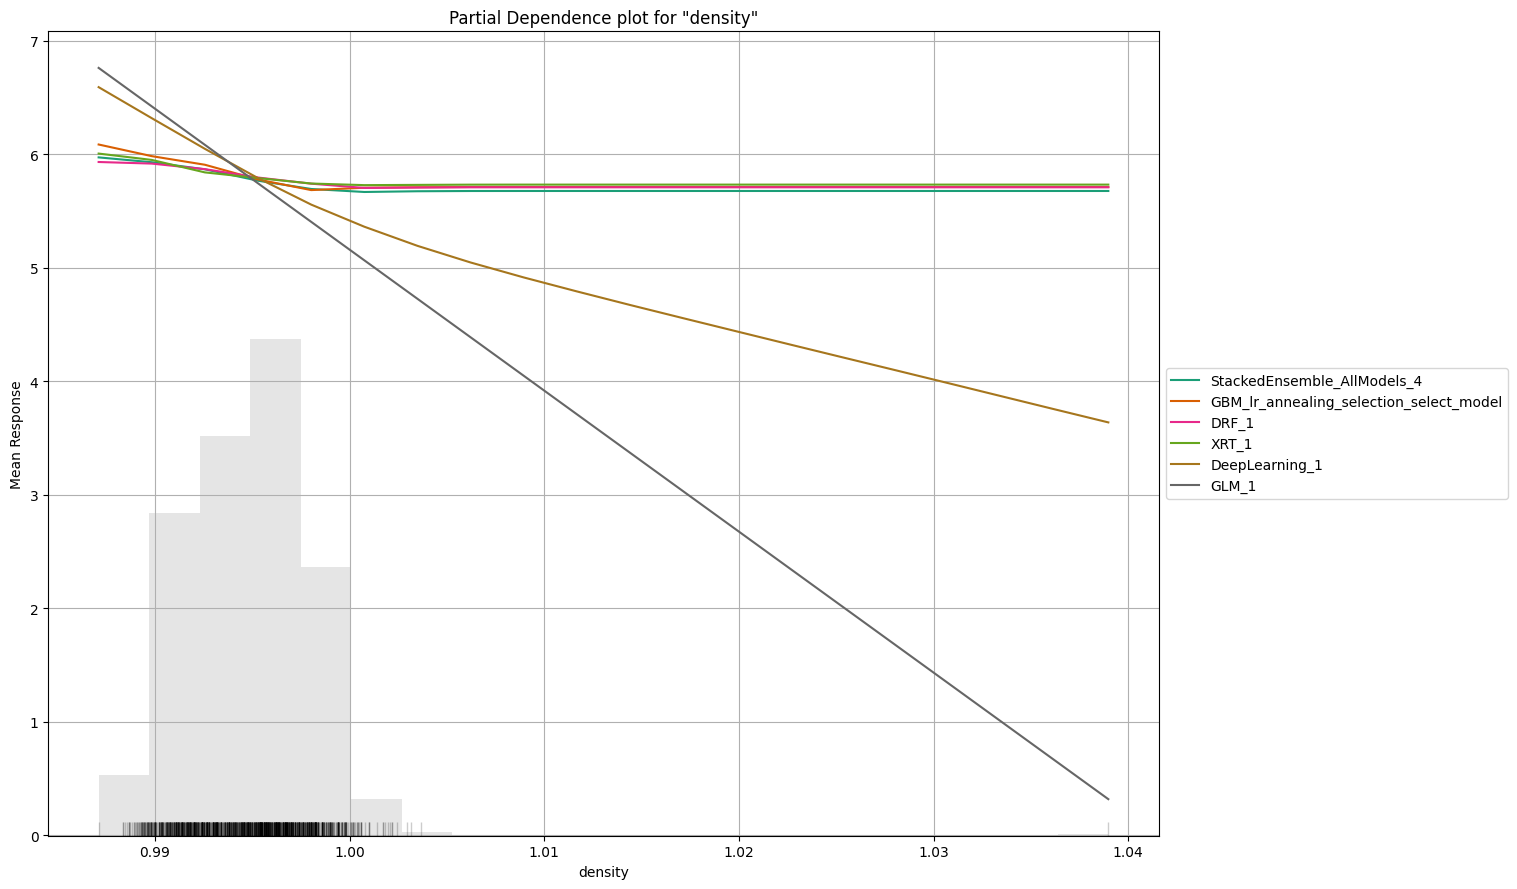

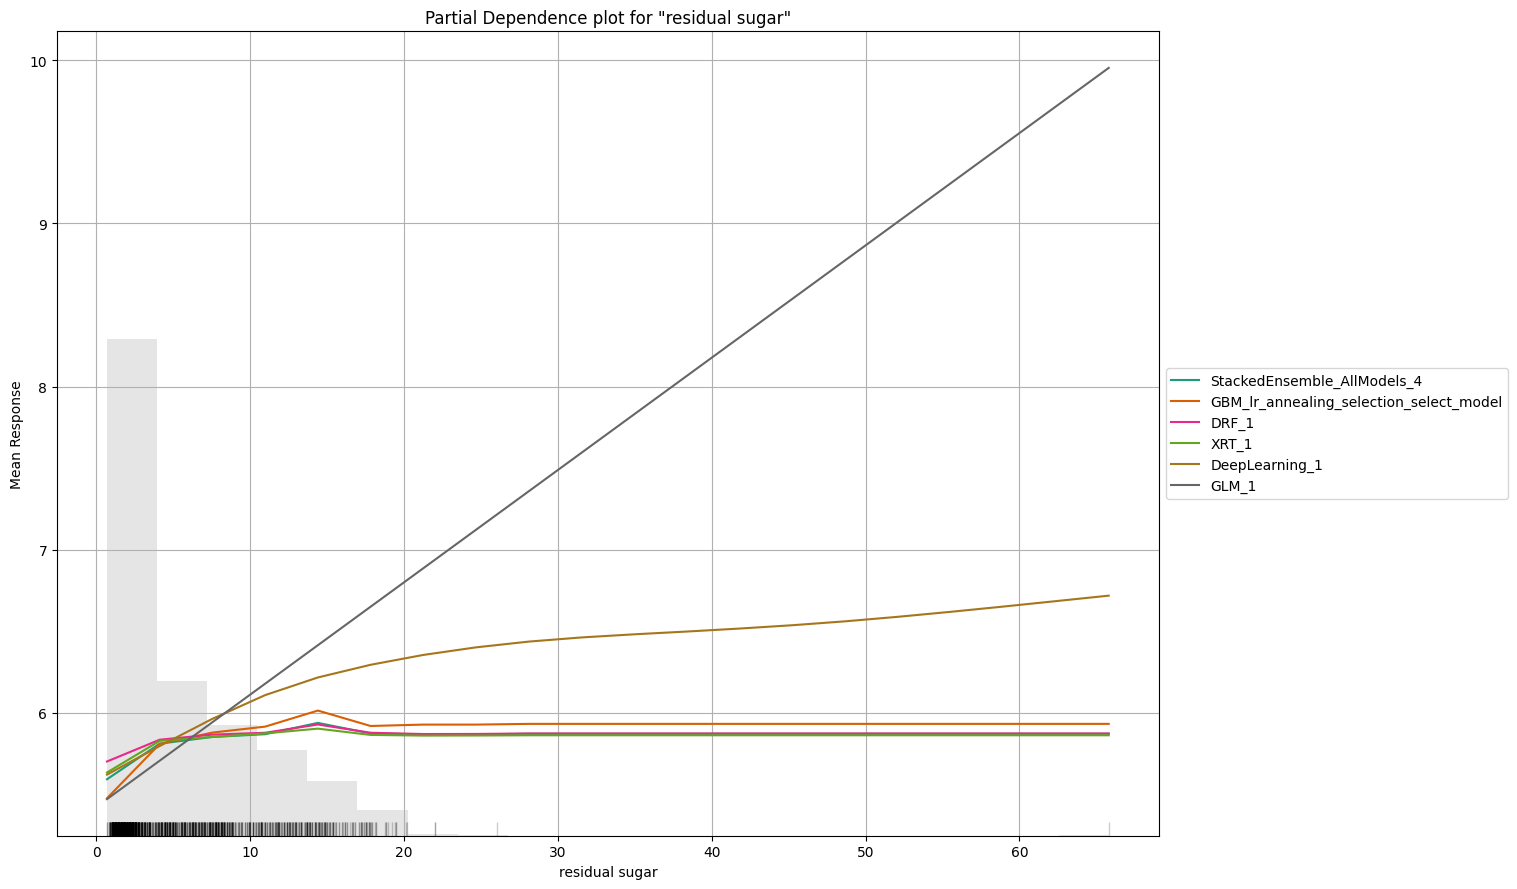

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

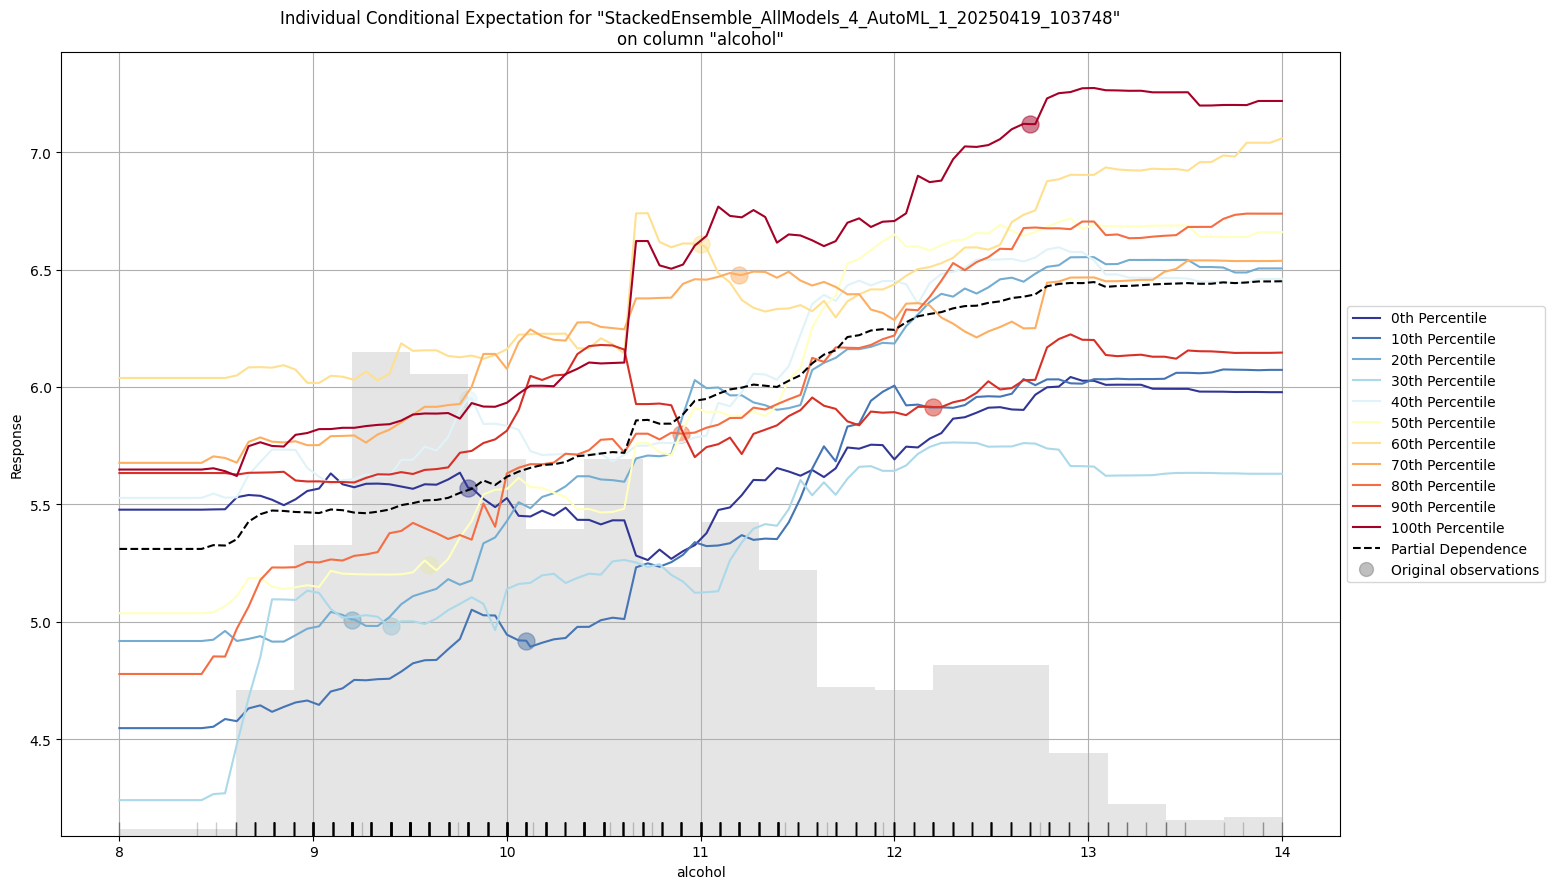

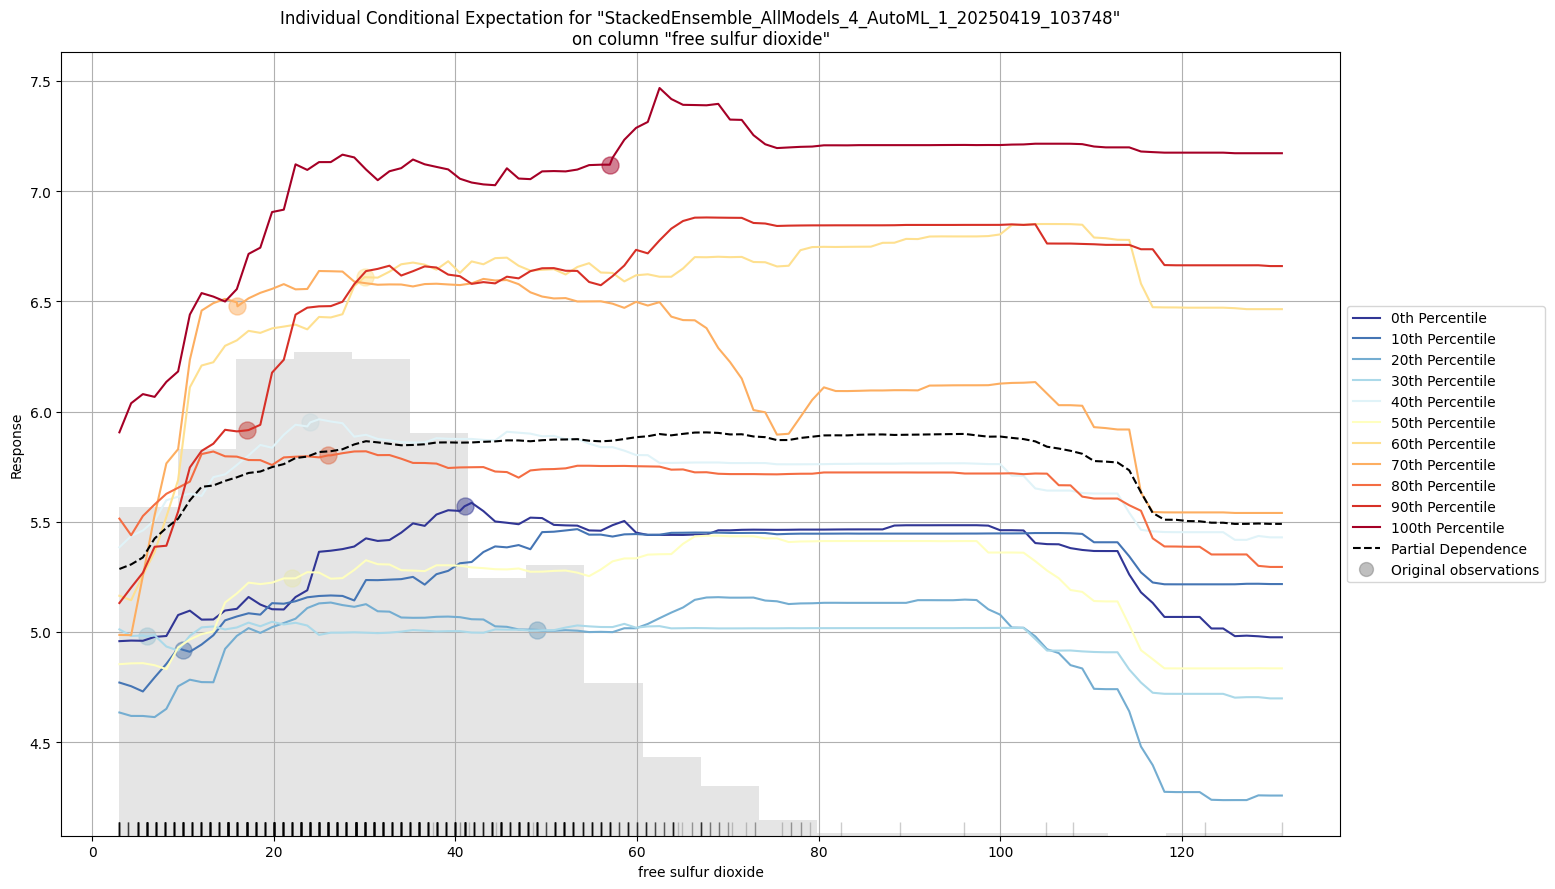

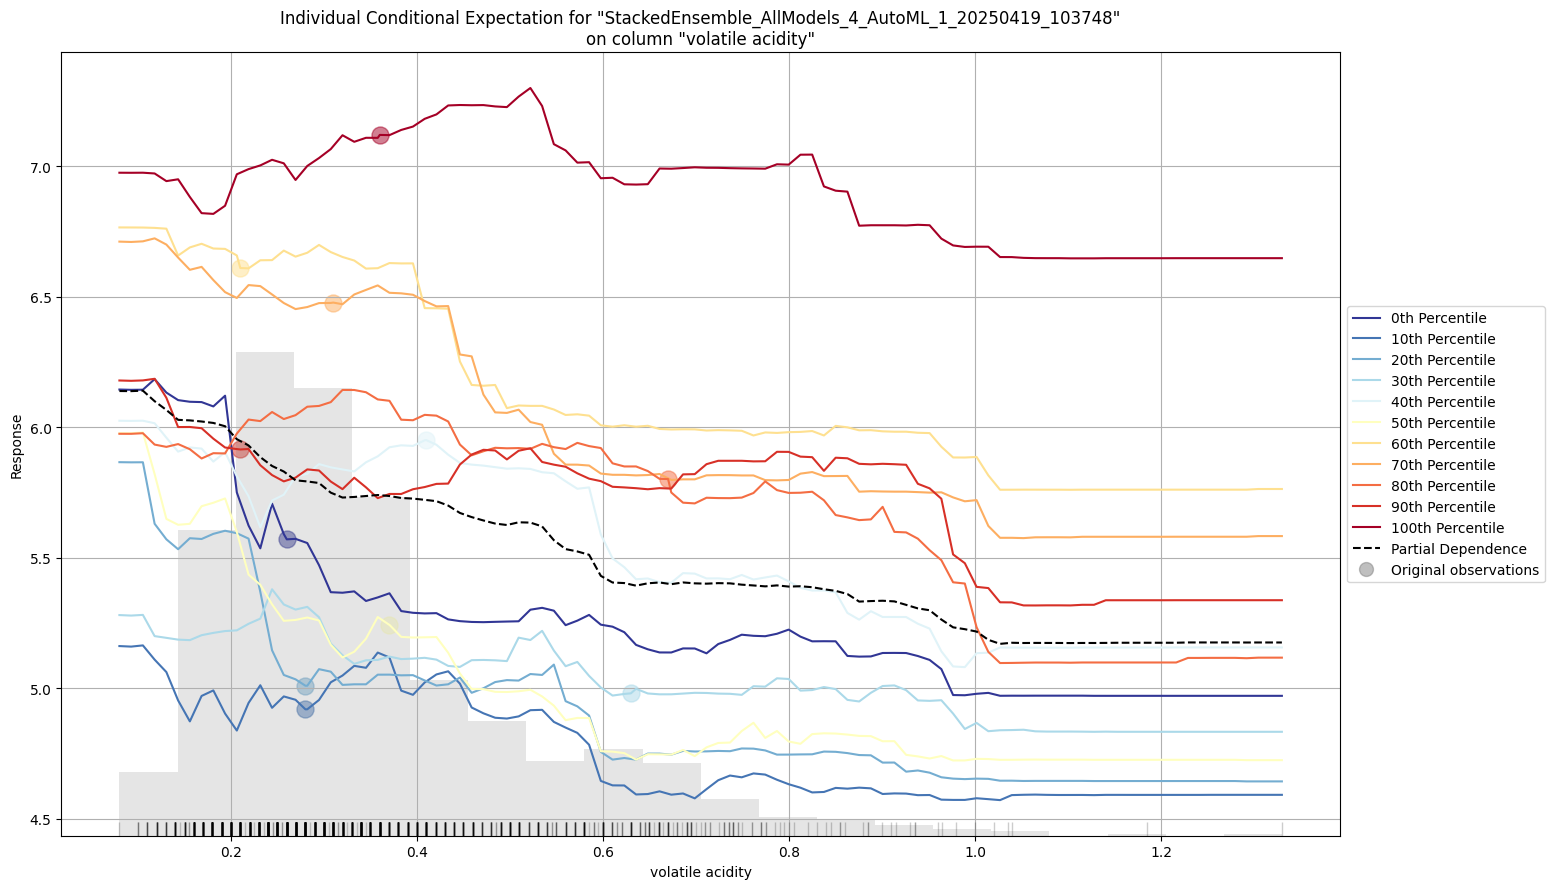

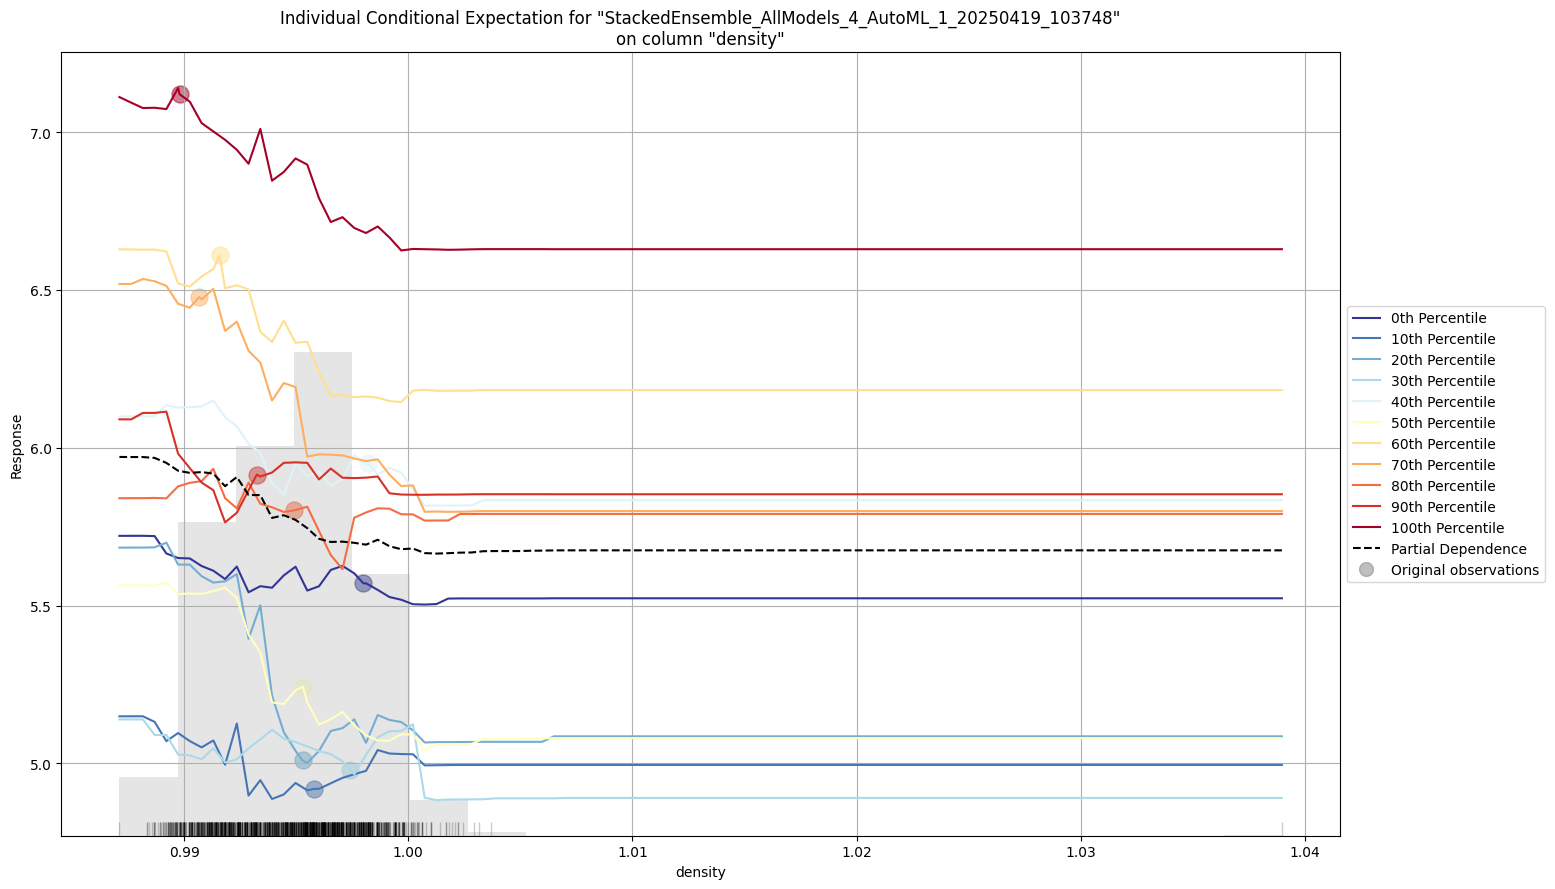

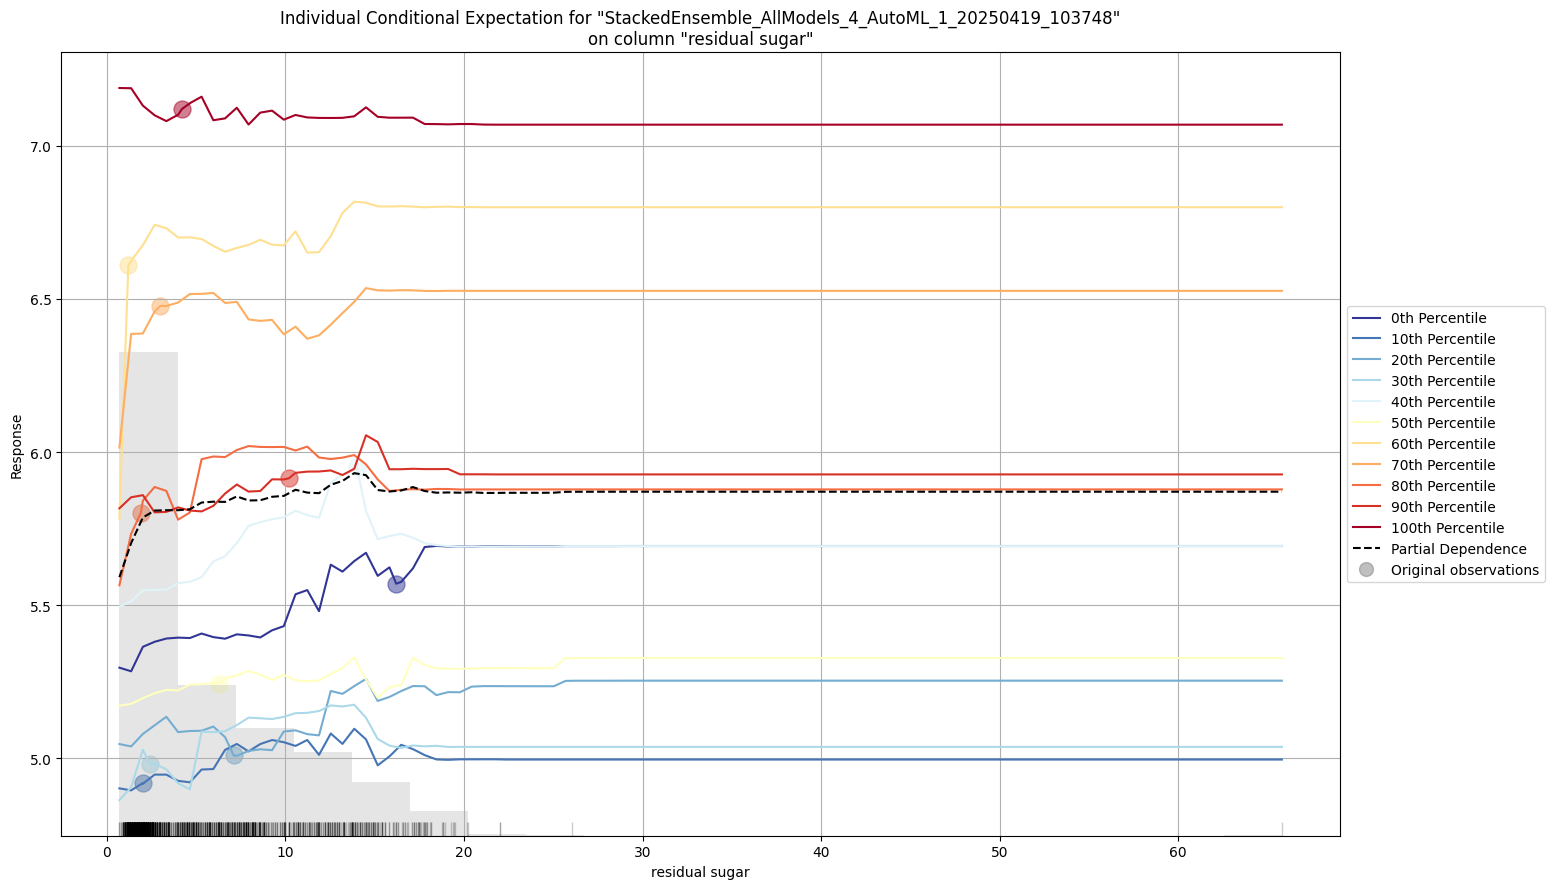

In [19]:
# AutoML Ï†ÑÏ≤¥ Í≤∞Í≥º ÏÑ§Î™Ö (Î¶¨Îçî Î™®Îç∏ Î∞è Îã§Î•∏ Î™®Îç∏ ÎπÑÍµê Ìè¨Ìï®)
print("--- H2O AutoML Ï†ÑÏ≤¥ ÏÑ§Î™Ö ---")
expl_aml = aml.explain(test_h2o)
# expl_aml Í∞ùÏ≤¥Î•º Ï∂úÎ†•ÌïòÎ©¥ Îã§ÏñëÌïú ÏÑ§Î™Ö ÌîåÎ°ØÏù¥ ÎÇòÌÉÄÎÇ©ÎãàÎã§. (Î≥ÄÏàò Ï§ëÏöîÎèÑ, Î™®Îç∏ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îì±)
# print(expl_aml) # Ï£ºÏÑù Ìï¥Ï†úÌïòÏó¨ Í≤∞Í≥º ÌôïÏù∏

#### ÏûîÏ∞® Î∂ÑÏÑù

>1. Ìå®ÌÑ¥ Ï°¥Ïû¨: Ïù¥ Í∑∏ÎûòÌîÑÏóêÏÑúÎäî ÏòàÏ∏°Í∞í(xÏ∂ï)Ïù¥ Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº ÏûîÏ∞®Í∞Ä ÎöúÎ†∑Ìïú ÏßÅÏÑ† Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù¥Í≥† ÏûàÏäµÎãàÎã§. Ïù¥ÏÉÅÏ†ÅÏù∏ ÏûîÏ∞® Î∂ÑÌè¨ÎùºÎ©¥ Î¨¥ÏûëÏúÑÎ°ú Î∂ÑÌè¨Ìï¥Ïïº ÌïòÎäîÎç∞, Ïù¥Îü∞ Ìå®ÌÑ¥ÏùÄ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏ†ï Í¥ÄÍ≥ÑÎ•º Ï∂©Î∂ÑÌûà Ìè¨Ï∞©ÌïòÏßÄ Î™ªÌñàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
>
>2. Ï§ÑÎ¨¥Îä¨ ÌòïÌÉú: Í∑∏ÎûòÌîÑÏóêÏÑú Î≥¥Ïù¥Îäî Î™ÖÌôïÌïú Ï§ÑÎ¨¥Îä¨ Ìå®ÌÑ¥ÏùÄ ÌÉÄÍ≤ü Î≥ÄÏàòÍ∞Ä Ï†ïÏàòÍ∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Î∞úÏÉùÌïòÎäî ÌòÑÏÉÅÏûÖÎãàÎã§. Ïù¥Îäî Î¨∏Ï†úÎùºÍ∏∞Î≥¥Îã§Îäî Ï†ïÏàòÌòï ÏùëÎãµ Î≥ÄÏàòÏùò ÌäπÏÑ±ÏûÖÎãàÎã§.
Ïù¥Î∂ÑÏÇ∞ÏÑ±: ÏòàÏ∏°Í∞íÏù¥ Îã¨ÎùºÏßêÏóê Îî∞Îùº ÏûîÏ∞®Ïùò Î∂ÑÏÇ∞Ïù¥ Î≥ÄÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥Î©∞, ÌäπÌûà ÏòàÏ∏°Í∞íÏù¥ Ï§ëÍ∞Ñ Î≤îÏúÑ(5.0~6.5)ÏóêÏÑú ÏûîÏ∞®Ïùò Î∂ÑÏÇ∞Ïù¥ Îçî ÌÅΩÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïù¥ ÌäπÏ†ï Î≤îÏúÑÏóêÏÑú ÏòàÏ∏° Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥Ïßà Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.
>
>3. Ïù¥ÏÉÅÏπò: Î™áÎ™á ÏßÄÏ†êÏóêÏÑú +3, -3 Ïù¥ÏÉÅÏùò ÌÅ∞ ÏûîÏ∞®Î•º Î≥¥Ïù¥Îäî Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏúºÎ©∞, Ïù¥Îäî Î™®Îç∏Ïù¥ ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Î•º Ïûò ÏòàÏ∏°ÌïòÏßÄ Î™ªÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
>
>Í≤∞Î°†Ï†ÅÏúºÎ°ú, Ïù¥ Î™®Îç∏ÏùÄ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥ÏßÄÎßå Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÎ∂Ä Ìå®ÌÑ¥ÏùÑ ÎÜìÏπòÍ≥† ÏûàÏúºÎ©∞, ÎπÑÏÑ†ÌòïÏÑ±Ïù¥ÎÇò Ï∂îÍ∞Ä Î≥ÄÏàò Í≥†Î†§Î•º ÌÜµÌï¥ Í∞úÏÑ†Ìï† Ïó¨ÏßÄÍ∞Ä ÏûàÏäµÎãàÎã§.

#### Learning Curve Î∂ÑÏÑù
> 1. Îã®Ïùº Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: Í∑∏ÎûòÌîÑÏóêÎäî Îã® ÌïòÎÇòÏùò Ìä∏Î†àÏù¥Îãù Ìè¨Ïù∏Ìä∏Îßå ÌëúÏãúÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Ïù¥Îäî Ïä§ÌÉù ÏïôÏÉÅÎ∏î Î©îÌÉÄÎü¨ÎÑàÏùò ÌäπÏÑ±ÏùÑ Î∞òÏòÅÌï©ÎãàÎã§. Ïù¥ Î™®Îç∏ÏùÄ Í∏∞Î≥∏ Î™®Îç∏Îì§Ïùò ÏòàÏ∏°ÏùÑ Ï°∞Ìï©ÌïòÎäî Î©îÌÉÄÎ™®Îç∏Î°ú, ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ìïú Î≤àÏùò ÌïôÏäµÎßå ÏàòÌñâÌï©ÎãàÎã§.
> 
> 2. Ìé∏Ï∞®(deviance) Í∞í: yÏ∂ïÏùò Í∞íÏùÄ ÏïΩ 0.37Î°ú, Ïù¥Îäî Î™®Îç∏Ïùò ÏÜêÏã§ Ìï®Ïàò Í∞íÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. Ïù¥ Í∞íÏùÄ Î¶¨ÎçîÎ≥¥ÎìúÏóêÏÑú Î≥∏ MSE Í∞í(0.369731)Í≥º Ïú†ÏÇ¨Ìï©ÎãàÎã§.
> 
> 3. ÏÑ†ÌÉùÎêú Î∞òÎ≥µ(Selected iterations): ÎÖπÏÉâ ÏàòÏßÅÏÑ†Ïù¥ iteration 1.0Ïóê ÌëúÏãúÎêòÏñ¥ ÏûàÏñ¥ Îã® Ìïú Î≤àÏùò ÌïôÏäµÏúºÎ°ú ÏµúÏ¢Ö Î™®Îç∏Ïù¥ ÏÑ†ÌÉùÎêòÏóàÏùåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
> 
> 4. ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ïÎ≥¥ Î∂ÄÏû¨: Í∑∏ÎûòÌîÑÏóêÎäî ÍµêÏ∞® Í≤ÄÏ¶ù Í≤∞Í≥ºÍ∞Ä ÌëúÏãúÎêòÏßÄ ÏïäÏïÑ Í≥ºÏ†ÅÌï© Ïó¨Î∂ÄÎ•º ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÌåêÎã®ÌïòÍ∏∞ Ïñ¥Î†µÏäµÎãàÎã§.
> 
> Ïù¥ Í∑∏ÎûòÌîÑÎäî StackedEnsemble Î™®Îç∏Ïùò ÌäπÏÑ±ÏÉÅ Í∏∞Î≥∏ Î™®Îç∏Îì§Ïùò ÏòàÏ∏°ÏùÑ Î©îÌÉÄÎ™®Îç∏Ïù¥ Ìïú Î≤à ÌïôÏäµÌïòÏó¨ ÌÜµÌï©ÌïòÎäî Í≥ºÏ†ïÏùÑ Î≥¥Ïó¨Ï£ºÎäî Í≤ÉÏúºÎ°ú, ÏùºÎ∞òÏ†ÅÏù∏ Ìä∏Î¶¨ Í∏∞Î∞ò ÏïåÍ≥†Î¶¨Ï¶òÏùò Î∞òÎ≥µÏ†Å ÌïôÏäµ Í≥ºÏ†ïÍ≥ºÎäî Îã§Î•∏ Ìå®ÌÑ¥ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Î™®Îç∏Ïùò ÏÑ±Îä• ÌèâÍ∞ÄÎäî Ïù¥ Í∑∏ÎûòÌîÑÎ≥¥Îã§ ÏïûÏÑú Î≥∏ Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥ºÎ•º ÌÜµÌï¥ Îçî Ïûò ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§.

#### ÌäπÏ†ï Î™®Îç∏ Î≥ÄÏàò Ï§ëÏöîÎèÑ Î∂ÑÏÑù
 
> Ïù¥ Í∑∏ÎûòÌîÑÎäî "GBM_lr_annealing_selection" Î™®Îç∏ÏóêÏÑú Í∞Å Î≥ÄÏàòÏùò ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
>
> 1. Í∞ÄÏû• Ï§ëÏöîÌïú Î≥ÄÏàò:
>    - ÏïåÏΩîÏò¨(alcohol)Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú Í∞ÄÏû• ÎÜíÏùÄ Ï§ëÏöîÎèÑ(ÏïΩ 1.0)Î•º Î≥¥Ïù¥Î©∞, Î™®Îç∏Ïùò ÏòàÏ∏°Ïóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ≥† ÏûàÏäµÎãàÎã§.
>
> 2. Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò Ï§ëÏöîÎèÑÎ•º Í∞ÄÏßÑ Î≥ÄÏàòÎì§:
>    - Ïú†Î¶¨ Ïù¥ÏÇ∞ÌôîÌô©(free sulfur dioxide): Ï§ëÏöîÎèÑ ÏïΩ 0.48
>    - ÌúòÎ∞úÏÑ± ÏÇ∞ÎèÑ(volatile acidity): Ï§ëÏöîÎèÑ ÏïΩ 0.46
>    - Î∞ÄÎèÑ(density): Ï§ëÏöîÎèÑ ÏïΩ 0.43
>    - ÏûîÎ•ò Îãπ(residual sugar): Ï§ëÏöîÎèÑ ÏïΩ 0.41
>    - Ï¥ù Ïù¥ÏÇ∞ÌôîÌô©(total sulfur dioxide): Ï§ëÏöîÎèÑ ÏïΩ 0.39
>
> 3. ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ï§ëÏöîÎèÑÎ•º Í∞ÄÏßÑ Î≥ÄÏàòÎì§:
>    - Ìô©ÏÇ∞Ïóº(sulphates): Ï§ëÏöîÎèÑ ÏïΩ 0.33
>    - ÏóºÌôîÎ¨º(chlorides): Ï§ëÏöîÎèÑ ÏïΩ 0.30
>    - pH: Ï§ëÏöîÎèÑ ÏïΩ 0.28
>    - Í≥†Ï†ï ÏÇ∞ÎèÑ(fixed acidity): Ï§ëÏöîÎèÑ ÏïΩ 0.27
>
> Ïù¥Îü¨Ìïú Í≤∞Í≥ºÎäî ÏôÄÏù∏Ïùò ÌíàÏßà ÏòàÏ∏°Ïóê ÏûàÏñ¥ÏÑú ÏïåÏΩîÏò¨ Ìï®ÎüâÏù¥ Í∞ÄÏû• Í≤∞Ï†ïÏ†ÅÏù∏ ÏöîÏÜåÏûÑÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, Ìô© Í¥ÄÎ†® ÏÑ±Î∂ÑÍ≥º ÏÇ∞ÎèÑÎèÑ Ï§ëÏöîÌïú ÏöîÏÜåÏûÑÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Ïù¥ Ï†ïÎ≥¥Î•º ÌôúÏö©ÌïòÏó¨ Î™®Îç∏ Í∞úÏÑ†Ïù¥ÎÇò ÏôÄÏù∏ ÌíàÏßà Í¥ÄÎ¶¨Ïóê ÏßëÏ§ëÌï† Î≥ÄÏàòÎ•º Í≤∞Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

#### Ï†ÑÏ≤¥Î™®Îç∏ Î≥ÄÏàò Ï§ëÏöîÎèÑ ÌûàÌä∏Îßµ

> Ïù¥ ÌûàÌä∏ÎßµÏùÄ Ïó¨Îü¨ Î™®Îç∏ÏóêÏÑú Í∞Å Î≥ÄÏàòÏùò Ï§ëÏöîÎèÑÎ•º ÎπÑÍµêÌïòÏó¨ Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏäµÎãàÎã§
>
> 1. ÏïåÏΩîÏò¨(alcohol) Î≥ÄÏàò:
>    - ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï§ëÏöîÎèÑ(Î∂âÏùÄÏÉâ Í≥ÑÏó¥)Î•º Î≥¥Ïù¥Í≥† ÏûàÏùå
>    - ÌäπÌûà GBM_grid_1_model_13, GBM_lr_annealing_selection_model, XRT_1, DRF_1 Î™®Îç∏ÏóêÏÑú Îß§Ïö∞ ÎÜíÏùÄ Ï§ëÏöîÎèÑÎ•º ÎÇòÌÉÄÎÉÑ
>    - ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏°Ïóê ÏûàÏñ¥ Í∞ÄÏû• ÏùºÍ¥ÄÎêòÍ≤å Ï§ëÏöîÌïú Î≥ÄÏàòÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå
>
> 2. ÏôÄÏù∏ Ïú†Ìòï(type) Î≥ÄÏàò:
>    - Î™®Îì† Î™®Îç∏ÏóêÏÑú ÏùºÍ¥ÄÎêòÍ≤å Í∞ÄÏû• ÎÇÆÏùÄ Ï§ëÏöîÎèÑ(ÏßôÏùÄ ÌååÎûÄÏÉâ)Î•º Î≥¥ÏûÑ
>    - ÏòàÏ∏°Ïóê Í±∞Ïùò ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú ÌåêÎã®Îê®
>
> 3. ÌúòÎ∞úÏÑ± ÏÇ∞ÎèÑ(volatile acidity)ÏôÄ Î∞ÄÎèÑ(density):
>    - ÏùºÎ∂Ä Î™®Îç∏ÏóêÏÑú Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò Ï§ëÏöîÎèÑ(Ïó∞Ìïú ÎÖ∏ÎûÄÏÉâ)Î•º Î≥¥ÏûÑ
>    - Î™®Îç∏Ïóê Îî∞Îùº Ï§ëÏöîÎèÑÏùò Î≥ÄÎèôÏù¥ ÏûàÏùå
>
> 4. Í∏∞ÌÉÄ Î≥ÄÏàòÎì§:
>    - ÏóºÌôîÎ¨º(chlorides), Ìô© Í¥ÄÎ†® Î≥ÄÏàòÎì§, pH Îì±ÏùÄ ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏ÏóêÏÑú Ï§ëÍ∞Ñ~ÎÇÆÏùÄ Ï§ëÏöîÎèÑÎ•º Î≥¥ÏûÑ
>    - Î™®Îç∏ÎßàÎã§ Ïù¥Îü¨Ìïú Î≥ÄÏàòÎì§Ïùò Ï§ëÏöîÎèÑ ÌèâÍ∞ÄÍ∞Ä Îã§ÏÜå Îã§Î•∏ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏùå
>
> 5. Î™®Îç∏ Í∞Ñ ÎπÑÍµê:
>    - GBM Í≥ÑÏó¥ Î™®Îç∏Îì§ ÏÇ¨Ïù¥ÏóêÏÑúÎèÑ Î≥ÄÏàò Ï§ëÏöîÎèÑ ÌèâÍ∞ÄÏóê Ï∞®Ïù¥Í∞Ä ÏûàÏùå
>    - ÏïôÏÉÅÎ∏î Î™®Îç∏(XRT_1, DRF_1)ÏùÄ GBM Î™®Îç∏Îì§Í≥º Ïú†ÏÇ¨Ìïú Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù¥ÏßÄÎßå ÏùºÎ∂Ä Î≥ÄÏàòÏóê ÎåÄÌï¥ Îã§Î•∏ Ï§ëÏöîÎèÑ ÌèâÍ∞ÄÎ•º Ìï®
>
> Ïù¥ ÌûàÌä∏ÎßµÏùÑ ÌÜµÌï¥ Îã§ÏñëÌïú Î™®Îç∏ÏóêÏÑú ÏïåÏΩîÏò¨ Ìï®ÎüâÏù¥ Í∞ÄÏû• Ï§ëÏöîÌïú ÏòàÏ∏° Î≥ÄÏàòÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏúºÎ©∞, ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° Ïãú Ïù¥ Î≥ÄÏàòÏóê ÌäπÌûà Ï£ºÎ™©Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

#### Î™®Îç∏ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ

> 1. Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÍ¥ÄÏÑ±
>    - ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏ ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(0.8 Ïù¥ÏÉÅ, Î∂âÏùÄÏÉâ Í≥ÑÏó¥)Î•º Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏñ¥ Îã§ÏñëÌïú Î™®Îç∏Îì§Ïù¥ Ïú†ÏÇ¨Ìïú Ìå®ÌÑ¥ÏúºÎ°ú ÏòàÏ∏°ÌïòÍ≥† ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
>    - ÎåÄÍ∞ÅÏÑ†Ïùò ÏßÑÌïú Î∂âÏùÄÏÉâÏùÄ Í∞Å Î™®Îç∏Ïù¥ ÏûêÏã†Í≥ºÏùò ÏôÑÎ≤ΩÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(1.0)Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
>
> 2. Î™®Îç∏ Í∑∏Î£πÎ≥Ñ ÌäπÏÑ±
>    - GBM Í≥ÑÏó¥ Î™®Îç∏Îì§(ÏÉÅÎã® ÏôºÏ™Ω): ÏÑúÎ°ú Í∞ÑÏóê ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥ÏßÄÎßå, Îã§Î•∏ Î™®Îç∏ Ïú†ÌòïÍ≥ºÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ ÏÉÅÍ¥ÄÏÑ±ÏùÑ Î≥¥ÏûÖÎãàÎã§.
>    - StackedEnsemble Î™®Îç∏Îì§: ÏÑúÎ°ú Í∞ÑÏóê Îß§Ïö∞ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(0.9 Ïù¥ÏÉÅ)Î•º Î≥¥Ïù¥Î©∞, ÌäπÌûà AllModelsÏôÄ BestOfFamily ÏïôÏÉÅÎ∏î Í∞ÑÏóêÎèÑ ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Îß§Ïö∞ Ïú†ÏÇ¨Ìï©ÎãàÎã§.
>    - XRT_1Í≥º StackedEnsemble_BestOfFamily_5Îäî Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Îäî Ïåç Ï§ë ÌïòÎÇòÏûÖÎãàÎã§.
>
> 3. Î™®Îç∏ Ï∞®Î≥ÑÏÑ±
>    - ÌûàÌä∏ÎßµÏóêÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 0.8 ÎØ∏ÎßåÏù∏ ÏòÅÏó≠Ïù¥ Í±∞Ïùò ÏóÜÏñ¥, ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏Ïù¥ ÎπÑÏä∑Ìïú Î∞©Ìñ•ÏúºÎ°ú ÏòàÏ∏°ÌïòÍ≥† ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
>    - Í∞ÄÏû• ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî GBM_grid_1_model_13Í≥º Îã§Î•∏ Î™®Îç∏Îì§ ÏÇ¨Ïù¥ÏóêÏÑú Í¥ÄÏ∞∞Îê©ÎãàÎã§(ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçú Î∂âÏùÄÏÉâ).
>
> 4. ÏïôÏÉÅÎ∏î Î™®Îç∏Ïùò ÌäπÏÑ±
>    - ÏïôÏÉÅÎ∏î Î™®Îç∏Îì§(StackedEnsemble)ÏùÄ Í∞úÎ≥Ñ Í∏∞Î≥∏ Î™®Îç∏Îì§Í≥ºÎèÑ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨, Îã§ÏñëÌïú Î™®Îç∏Ïùò ÏòàÏ∏°ÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌÜµÌï©ÌïòÍ≥† ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
>    - ÏÉÅÏúÑ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏ StackedEnsemble_AllModels_4Îäî Îã§Î•∏ ÏïôÏÉÅÎ∏î Î™®Îç∏Îì§Í≥º Îß§Ïö∞ Ïú†ÏÇ¨Ìïú ÏòàÏ∏° Ìå®ÌÑ¥ÏùÑ Î≥¥ÏûÖÎãàÎã§.
>
> Ïù¥ ÌûàÌä∏ÎßµÏùÄ Î™®Îç∏ Îã§ÏñëÏÑ± Ï∏°Î©¥ÏóêÏÑú ÌòÑÏû¨ Íµ¨Ï∂ïÎêú Î™®Îç∏Îì§Ïù¥ ÏÑúÎ°ú ÏÉÅÎãπÌûà Ïú†ÏÇ¨Ìïú ÏòàÏ∏°ÏùÑ ÌïúÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï£ºÎ©∞, Îçî Îã§ÏñëÌïú Ï†ëÍ∑ºÎ≤ïÏù¥ÎÇò Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÎèÑÏûÖÌïòÏó¨ Î™®Îç∏ ÏïôÏÉÅÎ∏îÏùò Îã§ÏñëÏÑ±ÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ¨ Ïó¨ÏßÄÍ∞Ä ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

#### SHAP ÏöîÏïΩ ÌîåÎ°Ø Î∂ÑÏÑù

> 1. ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏàúÏúÑ
>    - ÏïåÏΩîÏò¨(alcohol): Í∞ÄÏû• ÏòÅÌñ•Î†•Ïù¥ ÌÅ∞ ÌäπÏÑ±ÏúºÎ°ú, ÎÜíÏùÄ ÏïåÏΩîÏò¨ Ìï®Îüâ(Îπ®Í∞ÑÏÉâ Ï†ê)ÏùÄ ÎåÄÏ≤¥Î°ú ÏñëÏùò shap Í∞íÏùÑ Í∞ÄÏ†∏ ÏôÄÏù∏ ÌíàÏßà Ï†êÏàòÎ•º ÎÜíÏù¥ÎäîÎç∞ Í∏∞Ïó¨Ìï©ÎãàÎã§.
>    - ÌúòÎ∞úÏÑ± ÏÇ∞ÎèÑ(volatile acidity): Îëê Î≤àÏß∏Î°ú Ï§ëÏöîÌïú ÌäπÏÑ±ÏúºÎ°ú, ÎÜíÏùÄ Í∞í(Îπ®Í∞ÑÏÉâ)ÏùÄ Ï£ºÎ°ú ÏùåÏùò shap Í∞íÍ≥º Ïó∞Í¥ÄÎêòÏñ¥ ÌíàÏßà Ï†êÏàòÎ•º ÎÇÆÏ∂îÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§.
>    - Î∞ÄÎèÑ(density): ÏÑ∏ Î≤àÏß∏Î°ú Ï§ëÏöîÌïú ÌäπÏÑ±ÏúºÎ°ú, ÎÜíÏùÄ Î∞ÄÎèÑ(Îπ®Í∞ÑÏÉâ)Îäî ÌíàÏßà Ï†êÏàòÎ•º ÎÇÆÏ∂îÎäîÎç∞ Í∏∞Ïó¨Ìï©ÎãàÎã§.
>
> 2. ÌäπÏÑ± ÏòÅÌñ• Ìå®ÌÑ¥
>    - ÏïÑÌô©ÏÇ∞Ïóº(free sulfur dioxide, total sulfur dioxide): Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÏòÅÌñ•Î†•ÏùÑ Î≥¥Ïù¥Î©∞, ÎÜíÏùÄ Ï¥ù ÏïÑÌô©ÏÇ∞Ïóº Ìï®ÎüâÏùÄ ÌíàÏßàÏóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§.
>    - ÏûîÎ•ò ÎãπÎ∂Ñ(residual sugar): ÎÜíÏùÄ Í∞í(Îπ®Í∞ÑÏÉâ)ÏùÄ ÎåÄÏ≤¥Î°ú ÌíàÏßàÏóê Í∏çÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄÎßå, ÏòÅÌñ•Î†•ÏùÄ Ï§ëÍ∞Ñ Ï†ïÎèÑÏûÖÎãàÎã§.
>    - pH: ÎÜíÏùÄ pH Í∞íÏùÄ ÏïΩÍ∞Ñ Îçî ÎÜíÏùÄ ÌíàÏßà Ï†êÏàòÏôÄ Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
>
> 3. ÌäπÏÑ± Î∂ÑÌè¨ ÌäπÏßï
>    - ÎåÄÎ∂ÄÎ∂ÑÏùò ÌäπÏÑ±ÏùÄ 0ÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÎåÄÏπ≠Ï†ÅÏù∏ Î∂ÑÌè¨Î•º Î≥¥Ïù¥ÏßÄÎßå, ÏïåÏΩîÏò¨Í≥º ÌúòÎ∞úÏÑ± ÏÇ∞ÎèÑÎäî Îçî ÎÑìÏùÄ ÏòÅÌñ• Î≤îÏúÑÎ•º Í∞ñÏäµÎãàÎã§.
>    - ÌÉÄÏûÖ(type): Í∞ÄÏû• ÏòÅÌñ•Î†•Ïù¥ Ï†ÅÏùÄ ÌäπÏÑ±ÏúºÎ°ú, Ïù¥ÏßÑ Î≥ÄÏàòÎ°ú Î≥¥Ïù¥Î©∞ Îëê Í∞ÄÏßÄ Î≤îÏ£º(ÏïÑÎßàÎèÑ Î†àÎìú/ÌôîÏù¥Ìä∏ ÏôÄÏù∏)Ïùò Íµ¨Î∂ÑÏù¥ ÌíàÏßà ÏòàÏ∏°Ïóê ÌÅ∞ Ï∞®Ïù¥Î•º ÎßåÎì§ÏßÄ ÏïäÏäµÎãàÎã§.
>
> 4. Ï¢ÖÌï© Ìï¥ÏÑù
>    - ÏïåÏΩîÏò¨ Ìï®ÎüâÏù¥ ÎÜíÏùÑÏàòÎ°ù ÏôÄÏù∏ ÌíàÏßà Ï†êÏàòÍ∞Ä ÎÜíÏïÑÏßÄÎäî Í∞ïÌïú Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§.
>    - ÌúòÎ∞úÏÑ± ÏÇ∞ÎèÑÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù ÏôÄÏù∏ ÌíàÏßàÏù¥ Ìñ•ÏÉÅÎê©ÎãàÎã§.
>    - Î∞ÄÎèÑÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù ÌíàÏßà Ï†êÏàòÍ∞Ä Ï¢ãÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§.
>    - SHAP Í∞íÏùÄ Í∞Å ÌäπÏÑ±Ïùò Í∏∞Ïó¨ÎèÑÎ•º Ï†ïÎüâÌôîÌïòÏó¨ Î™®Îç∏Ïùò ÏòàÏ∏° Í≥ºÏ†ïÏùÑ Ìà¨Î™ÖÌïòÍ≤å Î≥¥Ïó¨Ï£ºÎ©∞, Ïù¥Îäî ÏôÄÏù∏ ÌíàÏßà Ìñ•ÏÉÅÏùÑ ÏúÑÌïú ÌäπÏÑ± ÏµúÏ†ÅÌôîÏóê Ï§ëÏöîÌïú Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌï©ÎãàÎã§.

#### ÏïåÏΩîÏò¨ Ìï®ÎüâÏóê ÎåÄÌïú Î∂ÄÎ∂Ñ ÏùòÏ°¥ÏÑ± ÌîåÎ°Ø Î∂ÑÏÑù
 
>1. Ï†ÑÎ∞òÏ†ÅÏù∏ Í≤ΩÌñ•ÏÑ±:
>   - Î™®Îì† Î™®Îç∏ÏóêÏÑú ÏïåÏΩîÏò¨ Ìï®ÎüâÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏòàÏ∏°Îêú ÏôÄÏù∏ ÌíàÏßà(Mean Response)Ïù¥ ÏùºÍ¥ÄÎêòÍ≤å Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
>   - ÏïåÏΩîÏò¨ Ìï®ÎüâÏù¥ 8%ÏóêÏÑú 14%Î°ú Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº ÏòàÏ∏° ÌíàÏßà Ï†êÏàòÎäî ÏïΩ 5.3ÏóêÏÑú 6.4Î°ú ÏÉÅÏäπÌï©ÎãàÎã§.
>
>2. ÎπÑÏÑ†ÌòïÏ†Å Í¥ÄÍ≥Ñ:
>   - ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏ÏùÄ ÏïåÏΩîÏò¨ Ìï®ÎüâÍ≥º ÌíàÏßà ÏÇ¨Ïù¥Ïóê Îã®ÏàúÌïú ÏÑ†Ìòï Í¥ÄÍ≥ÑÍ∞Ä ÏïÑÎãå ÎπÑÏÑ†ÌòïÏ†Å Ìå®ÌÑ¥ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
>   - ÌäπÌûà ÏïåÏΩîÏò¨ Ìï®Îüâ 11-12% Íµ¨Í∞ÑÏóêÏÑú ÌíàÏßà Ï¶ùÍ∞Ä ÏÜçÎèÑÍ∞Ä Îçî Í∞ÄÌååÎ•¥Í≤å ÎÇòÌÉÄÎÇ©ÎãàÎã§.
>
>3. Î™®Îç∏Î≥Ñ Ï∞®Ïù¥Ï†ê:
>   - GLM_1(ÌöåÏÉâ): Í∞ÄÏû• ÏÑ†ÌòïÏ†ÅÏù∏ Í¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨Ï£ºÎ©∞, ÏùºÏ†ïÌïú Í∏∞Ïö∏Í∏∞Î°ú Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
>   - StackedEnsemble_AllModels_4(ÎÖπÏÉâ): ÎÇÆÏùÄ ÏïåÏΩîÏò¨ Ìï®ÎüâÏóêÏÑúÎäî Î≥¥ÏàòÏ†ÅÏù∏ ÏòàÏ∏°ÏùÑ, ÎÜíÏùÄ Ìï®ÎüâÏóêÏÑúÎäî Îçî ÎÜíÏùÄ ÌíàÏßàÏùÑ ÏòàÏ∏°Ìï©ÎãàÎã§.
>   - DeepLearning_1(Í∞àÏÉâ): ÎÇÆÏùÄ ÏïåÏΩîÏò¨ Ìï®ÎüâÏóêÏÑú Îã§Î•∏ Î™®Îç∏Î≥¥Îã§ ÎÜíÏùÄ ÌíàÏßà ÏòàÏ∏°ÏùÑ Î≥¥ÏûÖÎãàÎã§.
>   - GBM Î™®Îç∏(Ï£ºÌô©ÏÉâ): Ï§ëÍ∞Ñ Î≤îÏúÑÏóêÏÑú ÏïΩÍ∞ÑÏùò Î≥ÄÎèôÏÑ±ÏùÑ Î≥¥Ïó¨Ï£ºÎ©∞, Îã§Î•∏ Î™®Îç∏Îì§Í≥º ÎπÑÍµêÌï¥ ÎèÖÌäπÌïú Ìå®ÌÑ¥ÏùÑ Î≥¥ÏûÖÎãàÎã§.
>
>4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:
>   - ÌïòÎã®Ïùò ÌöåÏÉâ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏïåÏΩîÏò¨ Ìï®ÎüâÏùò Î∂ÑÌè¨Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
>   - ÎåÄÎ∂ÄÎ∂ÑÏùò ÏôÄÏù∏ ÏÉòÌîåÏù¥ 9-12% ÏÇ¨Ïù¥Ïùò ÏïåÏΩîÏò¨ Ìï®ÎüâÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏúºÎ©∞, Ïù¥ Î≤îÏúÑÏóêÏÑú Î™®Îç∏Îì§Ïùò ÏòàÏ∏°Ïù¥ Í∞ÄÏû• Ïã†Î¢∞Ìï† ÎßåÌï©ÎãàÎã§.
>
>5. ÏûÑÍ≥ÑÏ†ê:
>   - ÏïåÏΩîÏò¨ Ìï®Îüâ 11% Î∂ÄÍ∑ºÏóêÏÑú ÎåÄÎ∂ÄÎ∂Ñ Î™®Îç∏Ïùò Í∏∞Ïö∏Í∏∞Í∞Ä Î≥ÄÌôîÌïòÎäîÎç∞, Ïù¥Îäî Ïù¥ ÏßÄÏ†êÏù¥ ÌíàÏßà ÌèâÍ∞ÄÏóê Ï§ëÏöîÌïú ÏûÑÍ≥ÑÍ∞íÏûÑÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.
>
>Ïù¥ Î∂ÄÎ∂Ñ ÏùòÏ°¥ÏÑ± ÌîåÎ°ØÏùÄ Îã§Î•∏ Î™®Îì† ÌäπÏÑ±Îì§Ïù¥ ÌèâÍ∑†Í∞íÏùÑ Ïú†ÏßÄÌïúÎã§Í≥† Í∞ÄÏ†ïÌñàÏùÑ Îïå, ÏïåÏΩîÏò¨ Ìï®ÎüâÎßå Î≥ÄÍ≤ΩÌïòÎ©¥ ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏°Ïù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÎäîÏßÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§. Î™®Îì† Î™®Îç∏Ïù¥ ÏïåÏΩîÏò¨ Ìï®ÎüâÏù¥ ÎÜíÏïÑÏßàÏàòÎ°ù ÌíàÏßà ÏòàÏ∏°Ïù¥ Ìñ•ÏÉÅÎêúÎã§Îäî ÏùºÍ¥ÄÎêú Ìå®ÌÑ¥ÏùÑ Î≥¥Ïó¨Ï£ºÏßÄÎßå, Í∑∏ Í¥ÄÍ≥ÑÎäî ÏôÑÏ†ÑÌûà ÏÑ†ÌòïÏ†ÅÏù¥ÏßÄ ÏïäÏäµÎãàÎã§. ÏôÄÏù∏ ÏÉùÏÇ∞ÏûêÎì§ÏùÄ ÌíàÏßà Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥ Ï†ÅÏ†àÌïú ÏïåÏΩîÏò¨ Ìï®Îüâ(ÌäπÌûà 11% Ïù¥ÏÉÅ)ÏùÑ Î™©ÌëúÎ°ú Ìï† Ïàò ÏûàÏúºÎ©∞, Ïù¥Îäî SHAP ÌîåÎ°ØÏóêÏÑúÎèÑ ÌôïÏù∏Îêú ÏïåÏΩîÏò¨ Î≥ÄÏàòÏùò Ï§ëÏöîÏÑ±ÏùÑ Îã§Ïãú ÌïúÎ≤à ÏûÖÏ¶ùÌï©ÎãàÎã§.

#### Ïú†Î¶¨ Ïù¥ÏÇ∞ÌôîÌô©(free sulfur dioxide)Ïóê ÎåÄÌïú Î∂ÄÎ∂Ñ ÏùòÏ°¥ÏÑ± ÌîåÎ°Ø Î∂ÑÏÑù

>1. ÎπÑÏÑ†ÌòïÏ†Å Í¥ÄÍ≥Ñ:
>   - ÏïåÏΩîÏò¨Í≥º Îã¨Î¶¨, Ïú†Î¶¨ Ïù¥ÏÇ∞ÌôîÌô©ÏùÄ ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏ÏóêÏÑú Î™ÖÌôïÌïú Ïó≠ UÏûêÌòï Ìå®ÌÑ¥ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
>   - ÏÜåÎüâ(0-20mg/L)ÏóêÏÑúÎäî ÎÜçÎèÑ Ï¶ùÍ∞ÄÏóê Îî∞Îùº ÏòàÏ∏° ÌíàÏßàÏù¥ Îπ†Î•¥Í≤å ÏÉÅÏäπÌï©ÎãàÎã§.
>   - Ï§ëÍ∞Ñ ÎÜçÎèÑ(20-100mg/L)ÏóêÏÑúÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ ÌíàÏßà ÏòàÏ∏°ÏùÑ Ïú†ÏßÄÌï©ÎãàÎã§.
>   - ÎÜíÏùÄ ÎÜçÎèÑ(100mg/L Ïù¥ÏÉÅ)ÏóêÏÑúÎäî ÌíàÏßà ÏòàÏ∏°Ïù¥ Í∏âÍ≤©Ìûà ÌïòÎùΩÌï©ÎãàÎã§.
>
>2. Î™®Îç∏Î≥Ñ Ï∞®Ïù¥Ï†ê:
>   - GLM_1(ÌöåÏÉâ ÏÑ†): Ïú†ÏùºÌïòÍ≤å ÏÑ†ÌòïÏ†Å Í¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨Ï£ºÎ©∞, ÎÜçÎèÑÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÌíàÏßà ÏòàÏ∏°Ïù¥ ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏÉÅÏäπÌï©ÎãàÎã§.
>   - DeepLearning_1(Í∞àÏÉâ): Ï¥àÍ∏∞Ïóê Îπ†Î•¥Í≤å ÏÉÅÏäπÌïòÍ≥† ÏïΩ 40mg/LÏóêÏÑú ÏµúÍ≥†Ï†êÏóê ÎèÑÎã¨Ìïú ÌõÑ Îã§Î•∏ Î™®Îç∏Îì§Î≥¥Îã§ Îçî Îπ†Î•¥Í≤å ÌïòÎùΩÌï©ÎãàÎã§.
>   - StackedEnsemble_AllModels_4(ÎÖπÏÉâ): Í≥†ÎÜçÎèÑÏóêÏÑúÎèÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏôÑÎßåÌïú ÌïòÎùΩÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
>   - DRF_1(Î∂ÑÌôçÏÉâ): Í∞ÄÏû• ÎÑìÏùÄ ÏµúÏ†Å Î≤îÏúÑÎ•º Î≥¥Ïó¨Ï£ºÎ©∞, ÏïΩ 90mg/LÍπåÏßÄ ÏïàÏ†ïÏ†ÅÏù∏ ÌíàÏßà ÏòàÏ∏°ÏùÑ Ïú†ÏßÄÌï©ÎãàÎã§.
>
>3. ÏµúÏ†Å Î≤îÏúÑ:
>   - ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏Ïù¥ ÏïΩ 20-40mg/L ÏÇ¨Ïù¥ÏóêÏÑú ÏµúÍ≥† ÌíàÏßà ÏòàÏ∏°ÏùÑ Î≥¥Ïó¨Ï£ºÎ©∞, Ïù¥Îäî ÏôÄÏù∏ Ï†úÏ°∞ Ïãú Ïù¥ÏÉÅÏ†ÅÏù∏ Ïú†Î¶¨ Ïù¥ÏÇ∞ÌôîÌô© ÎÜçÎèÑ Î≤îÏúÑÎ°ú Î≥º Ïàò ÏûàÏäµÎãàÎã§.
>   - 100mg/L Ïù¥ÏÉÅÏùò ÎÜçÎèÑÎäî Î™®Îì† ÎπÑÏÑ†Ìòï Î™®Îç∏ÏóêÏÑú ÌíàÏßàÏùÑ Ï†ÄÌïòÏãúÌÇ§Îäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ©ÎãàÎã§.
>
>4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:
>   - ÌöåÏÉâ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïú†Î¶¨ Ïù¥ÏÇ∞ÌôîÌô© ÎÜçÎèÑ Î∂ÑÌè¨Î•º Î≥¥Ïó¨Ï§çÎãàÎã§.
>   - ÎåÄÎ∂ÄÎ∂ÑÏùò ÏÉòÌîåÏù¥ 10-40mg/L Î≤îÏúÑÏóê ÏßëÏ§ëÎêòÏñ¥ ÏûàÏúºÎ©∞, Ïù¥ Î≤îÏúÑÏóêÏÑú Î™®Îç∏Îì§Ïùò ÏòàÏ∏°Ïù¥ Í∞ÄÏû• Ïã†Î¢∞Ìï† ÎßåÌï©ÎãàÎã§.
>   - 60mg/L Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏñ¥, Í≥†ÎÜçÎèÑÏóêÏÑúÏùò ÏòàÏ∏°ÏùÄ Ïã†Î¢∞ÎèÑÍ∞Ä ÎÇÆÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
>
>5. Ï¢ÖÌï© Ìï¥ÏÑù:
>   - Ïù¥ Î∂ÄÎ∂Ñ ÏùòÏ°¥ÏÑ± ÌîåÎ°ØÏùÄ ÏôÄÏù∏Ïùò ÌíàÏßàÏóê ÏûàÏñ¥ Ïú†Î¶¨ Ïù¥ÏÇ∞ÌôîÌô©Ïù¥ ÏµúÏ†ÅÏ†êÏù¥ ÏûàÎäî ÎπÑÏÑ†ÌòïÏ†Å Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßêÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
>   - ÎÑàÎ¨¥ Ï†ÅÏùÄ ÎÜçÎèÑÎäî ÏôÄÏù∏Ïùò ÏÇ∞ÌôîÏôÄ ÎØ∏ÏÉùÎ¨º Ïò§ÏóºÏóê Ï∑®ÏïΩÌïòÍ≤å ÎßåÎì§ Ïàò ÏûàÍ≥†, ÎÑàÎ¨¥ ÎÜíÏùÄ ÎÜçÎèÑÎäî Ìñ•ÎØ∏Ïóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏäµÎãàÎã§.
>   - GLMÍ≥º Í∞ôÏùÄ ÏÑ†Ìòï Î™®Îç∏ÏùÄ Ïù¥Îü¨Ìïú Î≥µÏû°Ìïú Í¥ÄÍ≥ÑÎ•º Ï†úÎåÄÎ°ú Ìè¨Ï∞©ÌïòÏßÄ Î™ªÌïòÎäî Î∞òÎ©¥, ÏïôÏÉÅÎ∏î Î™®Îç∏Í≥º Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏Îì§ÏùÄ Îçî Ï†ïÍµêÌïòÍ≤å Ïù¥ Í¥ÄÍ≥ÑÎ•º Î™®Îç∏ÎßÅÌï®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
>   - ÏôÄÏù∏ Ï†úÏ°∞ÏûêÎì§ÏùÄ ÏïΩ 20-40mg/LÏùò Ïú†Î¶¨ Ïù¥ÏÇ∞ÌôîÌô© ÎÜçÎèÑÎ•º Î™©ÌëúÎ°ú ÌïòÎ©¥ ÌíàÏßà ÏµúÏ†ÅÌôîÏóê ÎèÑÏõÄÏù¥ Îê† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê©ÎãàÎã§.

In [ ]:
# # ÏµúÏ†Å Î™®Îç∏(Leader Model)Ïóê ÎåÄÌïú ÏÑ§Î™Ö
# print("\\n--- H2O Leader Model ÏÑ§Î™Ö ---")
# expl_leader = leader_model.explain(test_h2o)
# # print(expl_leader) # Ï£ºÏÑù Ìï¥Ï†úÌïòÏó¨ Í≤∞Í≥º ÌôïÏù∏ (Î≥ÄÏàò Ï§ëÏöîÎèÑ, Î∂ÄÎ∂Ñ ÏùòÏ°¥ÏÑ± ÌîåÎ°Ø Îì±)

In [ ]:
# # ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏(Ìñâ)Ïóê ÎåÄÌïú Î°úÏª¨ ÏÑ§Î™Ö (Ïòà: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï≤´ Î≤àÏß∏ Ìñâ)
# print("\\n--- H2O Leader Model Î°úÏª¨ ÏÑ§Î™Ö (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï≤´ Î≤àÏß∏ Ìñâ) ---")
# row_index_to_explain = 0
# expl_row = leader_model.explain_row(test_h2o, row_index=row_index_to_explain)
# # print(expl_row) # Ï£ºÏÑù Ìï¥Ï†úÌïòÏó¨ Í≤∞Í≥º ÌôïÏù∏ (SHAP Í∏∞Ïó¨ÎèÑ, ICE ÌîåÎ°Ø Îì±)


#### XAI : LIME ÎùºÏù¥Î∏åÎü¨Î¶¨ ÌôúÏö©

In [31]:
X_train_pd

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               7.2              0.23         0.32             8.5      0.058   
3               7.2              0.23         0.32             8.5      0.058   
4               8.1              0.28         0.40             6.9      0.050   
...             ...               ...          ...             ...        ...   
5200            6.8              0.62         0.08             1.9      0.068   
5201            6.2              0.60         0.08             2.0      0.090   
5202            5.9              0.55         0.10             2.2      0.062   
5203            6.3              0.51         0.13             2.3      0.076   
5204            6.0              0.31         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    47.0                 186.0  0.99560  3.19       0.40   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                  97.0  0.99510  3.26       0.44   
...                   ...                   ...      ...   ...        ...   
5200                 28.0                  38.0  0.99651  3.42       0.82   
5201                 32.0                  44.0  0.99490  3.45       0.58   
5202                 39.0                  51.0  0.99512  3.52       0.76   
5203                 29.0                  40.0  0.99574  3.42       0.75   
5204                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol   type  
0         8.8  white  
1         9.5  white  
2         9.9  white  
3         9.9  white  
4        10.1  white  
...       ...    ...  
5200      9.5    red  
5201     10.5    red  
5202     11.2    red  
5203     11.0    red  
5204     11.0    red  

[5205 rows x 12 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Î≤îÏ£ºÌòï ÌäπÏÑ± Ï∞æÍ∏∞
categorical_features = [i for i, col in enumerate(X_train_pd.columns) if X_train_pd[col].dtype == 'object' or X_train_pd[col].dtype.name == 'category']

# Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨Î≥∏ ÎßåÎì§Í∏∞
X_train_numeric = X_train_pd.copy()
X_test_numeric = X_test_pd.copy()

# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Ï†ÅÏö©
label_encoders = {}
for i in categorical_features:
    col = X_train_pd.columns[i]
    le = LabelEncoder()
    X_train_numeric[col] = le.fit_transform(X_train_pd[col])
    X_test_numeric[col] = le.transform(X_test_pd[col])
    label_encoders[i] = le

# Ïù∏Ïä§ÌÑ¥Ïä§ ÏÑ†ÌÉù (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ìïú Ìñâ)
instance_index_lime = 0  # Ï≤´ Î≤àÏß∏ ÌÖåÏä§Ìä∏ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÇ¨Ïö©
instance_lime = X_test_numeric.iloc[instance_index_lime].values

# LIME ÏÑ§Î™ÖÏûê ÏÉùÏÑ±
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_numeric.values,
    feature_names=X_train_numeric.columns.tolist(),
    class_names=['low_quality', 'high_quality'],
    categorical_features=categorical_features,
    mode='regression' if leader_model.algo not in ["gbm", "drf", "xgboost", "deeplearning"] or leader_model.params['distribution']['value'] in ['gaussian', 'poisson', 'gamma', 'tweedie'] else 'classification'
)

# H2O Î™®Îç∏ ÏòàÏ∏° Ìï®Ïàò ÎûòÌçº
def h2o_predict_proba_wrapper_lime(X):
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
    X_df = pd.DataFrame(X, columns=X_train_numeric.columns)
    
    # Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í∞íÏùÑ ÏõêÎûò Î≤îÏ£ºÌòï Í∞íÏúºÎ°ú Îã§Ïãú Î≥ÄÌôò
    X_original = X_df.copy()
    for i in categorical_features:
        col = X_train_numeric.columns[i]
        X_original[col] = label_encoders[i].inverse_transform(X_df[col].astype(int))
    
    # H2O ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
    X_h2o = h2o.H2OFrame(X_original)
    
    # ÏòàÏ∏° ÏàòÌñâ
    preds = leader_model.predict(X_h2o).as_data_frame()
    
    # Î∂ÑÎ•ò Î¨∏Ï†úÏù∏ Í≤ΩÏö∞ ÌôïÎ•† Î∞òÌôò, ÌöåÍ∑Ä Î¨∏Ï†úÏù∏ Í≤ΩÏö∞ ÏòàÏ∏°Í∞í Î∞òÌôò
    if leader_model.algo in ["gbm", "drf", "xgboost", "deeplearning"] and leader_model.params['distribution']['value'] not in ['gaussian', 'poisson', 'gamma', 'tweedie']:
        if 'p0' in preds.columns:  # Ïù¥ÏßÑ Î∂ÑÎ•ò
            return preds[['p0', 'p1']].values
        else:  # ÌöåÍ∑Ä
            return preds['predict'].values.reshape(-1, 1)
    else:  # ÌöåÍ∑Ä
        return preds['predict'].values.reshape(-1, 1)

# ÏÑ§Î™Ö ÏÉùÏÑ±
num_features_lime = 5  # ÏÑ§Î™ÖÏóê ÏÇ¨Ïö©Ìï† ÌäπÏÑ± Ïàò
explanation_lime = explainer_lime.explain_instance(
    data_row=instance_lime,
    predict_fn=h2o_predict_proba_wrapper_lime,
    num_features=num_features_lime
)

print(f"\nLIME Explanation (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§ {instance_index_lime}):")

# show_in_notebook ÎåÄÏã† ÌÖçÏä§Ìä∏ ÌòïÌÉúÎ°ú Í≤∞Í≥º Ï∂úÎ†•
print("\nLIME Í≤∞Í≥º (ÌäπÏÑ± Ï§ëÏöîÎèÑ):")
for feature, importance in explanation_lime.as_list():
    print(f"{feature}: {importance:.4f}")

# ÏõêÎûò ÌäπÏÑ± Í∞íÍ≥º ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
print("\nÏõêÎ≥∏ Ïù∏Ïä§ÌÑ¥Ïä§ Ï†ïÎ≥¥:")
for i, col in enumerate(X_train_pd.columns):
    original_value = X_test_pd.iloc[instance_index_lime][col]
    print(f"{col}: {original_value}")

# ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
instance_h2o = h2o.H2OFrame(X_test_pd.iloc[[instance_index_lime]])
prediction = leader_model.predict(instance_h2o).as_data_frame()
print("\nÏòàÏ∏° Í≤∞Í≥º:")
print(prediction)

# Î∂ÑÎ•ò Î¨∏Ï†úÏù∏ Í≤ΩÏö∞ ÏòàÏ∏° ÌôïÎ•† Ï∂úÎ†•
if leader_model.algo in ["gbm", "drf", "xgboost", "deeplearning"] and leader_model.params['distribution']['value'] not in ['gaussian', 'poisson', 'gamma', 'tweedie']:
    if 'p0' in prediction.columns:
        print(f"Class 0 (low_quality) ÌôïÎ•†: {prediction['p0'].values[0]:.4f}")
        print(f"Class 1 (high_quality) ÌôïÎ•†: {prediction['p1'].values[0]:.4f}")